In [1]:
import datetime

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
sns.set()

In [2]:
from covid_tracking_data.collector import *
from covid_analysis.utility import *
from covid_analysis.models import *
from ourworldindata_org.collector import get_dataset_df_from_file as get_world_dataset_df_from_file

In [3]:
 from matplotlib.axes._axes import _log as matplotlib_axes_logger
 matplotlib_axes_logger.setLevel('ERROR')

### Fetch the latest data

If the interface is overloaded, the collector will retry every few seconds.

In [4]:
df, states_in_order = get_dataset_df()
fns = save_data(df, states_in_order)
print("data saved to {} and {}".format(*fns))

            positive       negative       pending  hospitalizedCurrently  \
count    1590.000000    1451.000000    458.000000             102.000000   
mean     1117.259748    5998.330806   1457.122271            1092.205882   
std      5778.230855   13813.429501   8678.444895            2913.480931   
min         0.000000       0.000000     -3.000000               2.000000   
25%         8.000000     103.500000      4.000000              32.500000   
50%        70.500000     940.000000     21.000000              63.500000   
75%       431.250000    5427.000000    102.000000             295.500000   
max    102863.000000  168139.000000  64400.000000           14810.000000   

       hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
count              426.000000       31.000000        62.000000   
mean               531.676056      867.483871       331.983871   
std               2230.013190     1136.951505       686.573638   
min                  0.000000        9.000000      

### Fetch data set from local disk

In [5]:
!ls ~/data/
# gets thte latest file names
recent = ! ls -drt ~/data/* | tail -n 2
print("Latest files are:\n\t{}\n\t{}".format(*recent))

2020-04-01_1652_state_daily_data.csv 2020-04-03_1448_state_rank.csv
2020-04-01_1652_state_rank.csv       2020-04-03_1503_state_daily_data.csv
2020-04-01_1654_state_daily_data.csv 2020-04-03_1503_state_rank.csv
2020-04-01_1654_state_rank.csv       2020-04-03_1525_state_daily_data.csv
2020-04-01_1658_state_daily_data.csv 2020-04-03_1525_state_rank.csv
2020-04-01_1658_state_rank.csv       2020-04-04_0009_state_daily_data.csv
2020-04-03_0323_state_daily_data.csv 2020-04-04_0009_state_rank.csv
2020-04-03_0323_state_rank.csv       2020-04-04_1605_state_daily_data.csv
2020-04-03_0345_state_daily_data.csv 2020-04-04_1605_state_rank.csv
2020-04-03_0345_state_rank.csv       2020-04-04_1612_state_daily_data.csv
2020-04-03_1448_state_daily_data.csv 2020-04-04_1612_state_rank.csv
Latest files are:
	/Users/drskippy/data/2020-04-04_1612_state_daily_data.csv
	/Users/drskippy/data/2020-04-04_1612_state_rank.csv


In [6]:
df, states_in_order = get_dataset_df_from_file(recent)
df.head()

date state  positive  negative  pending  hospitalizedCurrently  \
0 2020-03-04    NY       6.0      48.0     24.0                    NaN   
1 2020-03-05    NY      22.0      76.0     24.0                    NaN   
2 2020-03-06    NY      33.0      92.0    236.0                    NaN   
3 2020-03-07    NY      76.0      92.0    236.0                    NaN   
4 2020-03-08    NY     105.0      92.0      NaN                    NaN   

   hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0                     NaN             NaN              NaN   
1                     NaN             NaN              NaN   
2                     NaN             NaN              NaN   
3                     NaN             NaN              NaN   
4                     NaN             NaN              NaN   

   onVentilatorCurrently  ...  totalTestResults  posNeg fips deathIncrease  \
0                    NaN  ...                54      54   36           NaN   
1                    NaN  ...                98      98   36           0.0   
2                    NaN  ...               125     125   36           0.0   
3                    NaN  ...               168     168   36           0.0   
4                    NaN  ...               197     197   36           0.0   

   hospitalizedIncrease  negativeIncrease  positiveIncrease  \
0                   NaN               NaN               NaN   
1                   0.0              28.0              16.0   
2                   0.0              16.0              11.0   
3                   0.0               0.0              43.0   
4                   0.0               0.0              29.0   

   totalTestResultsIncrease  order        lastUpdateEt  
0                       NaN      0 2020-04-03 11:00:00  
1                      44.0      0 2020-04-03 11:00:00  
2                      27.0      0 2020-04-03 11:00:00  
3                      43.0      0 2020-04-03 11:00:00  
4                      29.0      0 2020-04-03 11:00:00  

[5 rows x 27 columns]

In [7]:
dfus, _ = get_state_df(df, "*")
dfus["sum_of_tests"] = dfus["positive"] + dfus["negative"] + dfus["pending"]
dfus.tail()

date  positive   negative  pending  totalTestResults   death  \
26 2020-03-30  160530.0   784324.0  65369.0            944854  2939.0   
27 2020-03-31  184683.0   864201.0  59518.0           1048884  3746.0   
28 2020-04-01  210816.0   939190.0  59669.0           1150006  4700.0   
29 2020-04-02  239099.0  1028649.0  62101.0           1267748  5784.0   
30 2020-04-03  271988.0  1135356.0  61980.0           1407344  6962.0   

          lastUpdateEt  daily_new_positive  sum_of_tests  
26 2020-04-03 23:00:00             21469.0     1010223.0  
27 2020-04-03 23:00:00             24153.0     1108402.0  
28 2020-04-03 23:00:00             26133.0     1209675.0  
29 2020-04-03 23:00:00             28283.0     1329849.0  
30 2020-04-03 23:00:00             32889.0     1469324.0

### Zero-day normalized log plots

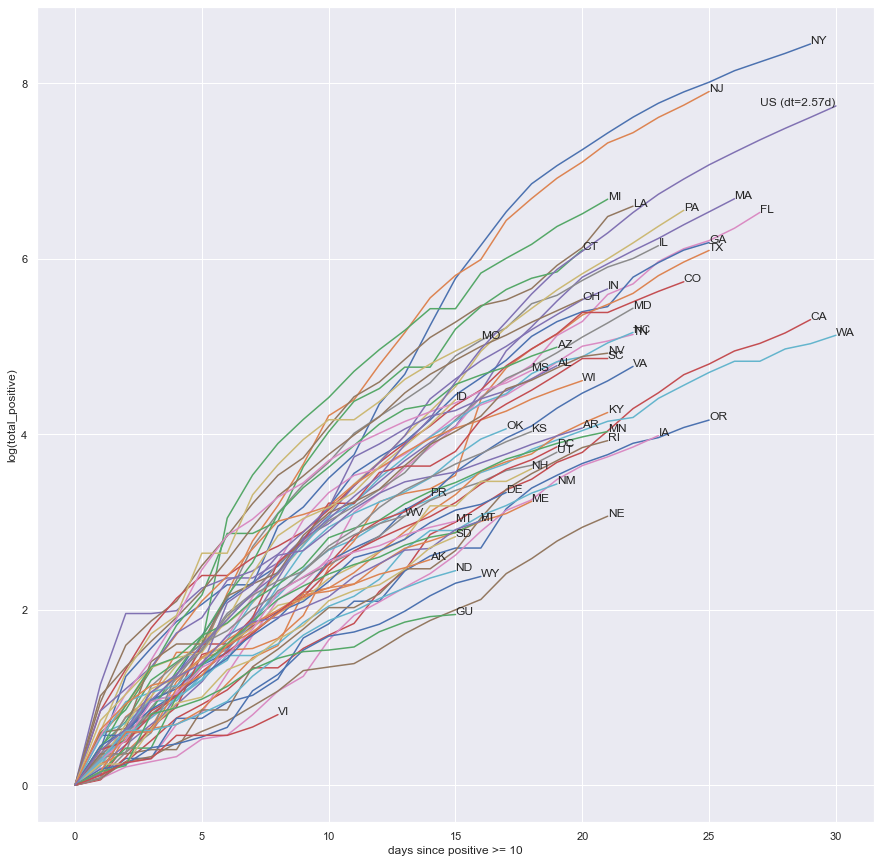

In [8]:
# start after day with min_pos or more cases
min_pos = 10
last_n_days = None

# image
plt.figure(figsize=[15,15])

key_value = "days_since_{}".format(min_pos)

# state by state
for s in states_in_order:
    try:
        dfq, dt, lud = get_state_doubling_df(df, s, zero_aligned=True, min_pos=min_pos, use_last_n_days=last_n_days)
        plt.plot(dfq[key_value].values, dfq.log_positive.values)
        plt.annotate(s, (dfq[key_value].values[-1], dfq.log_positive.values[-1]))
    except IndexError:
        pass

# All US image
try:
    dfq, dt, lud = get_state_doubling_df(df, "*", zero_aligned=True, min_pos=min_pos, use_last_n_days=last_n_days)
    plt.plot(dfq[key_value].values, dfq.log_positive.values)
    xus = int(.9* dfq[key_value].values[-1])
    plt.annotate("US (dt={:1.2f}d)".format(dt), (xus , dfq.log_positive.values[-1]))
except IndexError:
    pass

plt.xlabel("days since positive >= {}".format(min_pos))
plt.ylabel("log(total_positive)")
plt.show()

### US Totals and Doubling Times

US Total Positive, doubling every 4.42 days
  as of 2020-04-03T23:00
  based on last 10 days of data


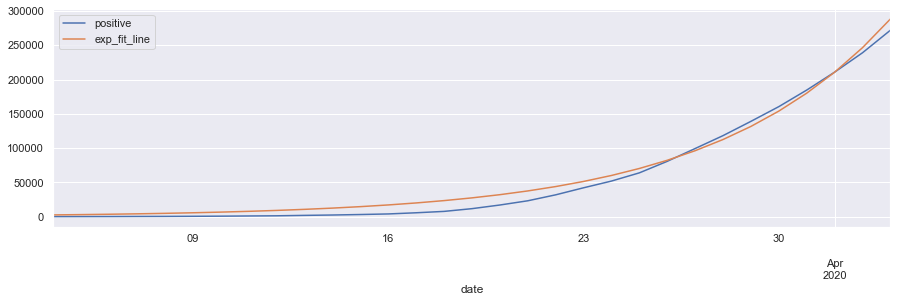

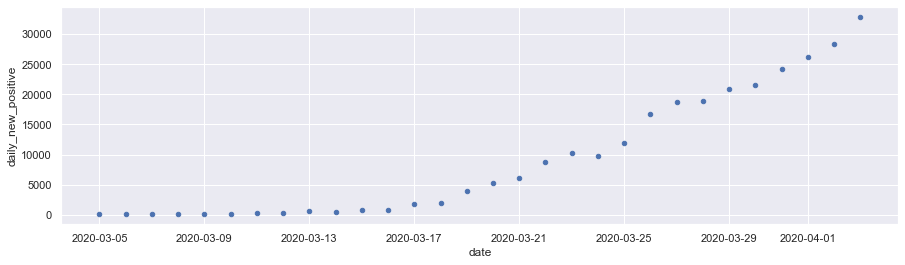

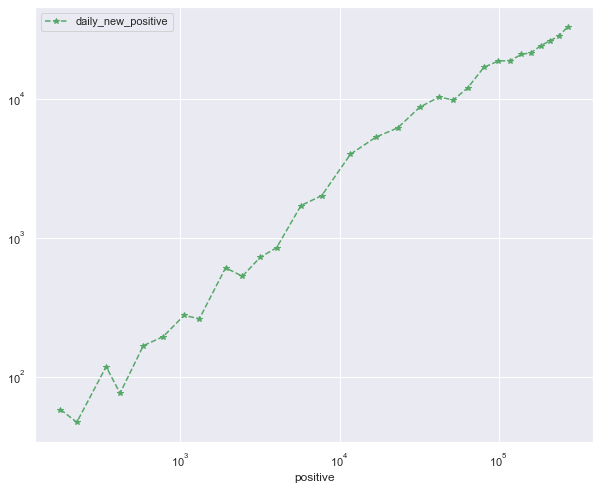

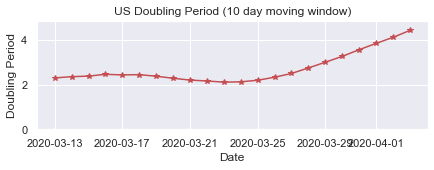

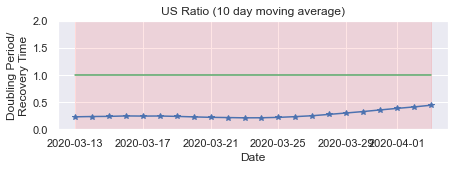

In [9]:
last_n_days = 10
dfa, dt, lud = get_state_doubling_df(df, "*", use_last_n_days=last_n_days)
lu = str(lud)[:16]
print("US Total Positive, doubling every {:.3} days\n  as of {}".format(dt, lu))
print("  based on last {} days of data".format(last_n_days))
dfa.plot(x="date", y=["positive", "exp_fit_line"], figsize=[15,4])
dfa.plot.scatter(x="date", y="daily_new_positive", figsize=[15,4])
dfa.plot(x="positive", y="daily_new_positive", figsize=[10,8], style="*--g", logy=True, logx=True)
period_factor_plot(dfq, "*", ylimit=2)
plt.show()

### Testing

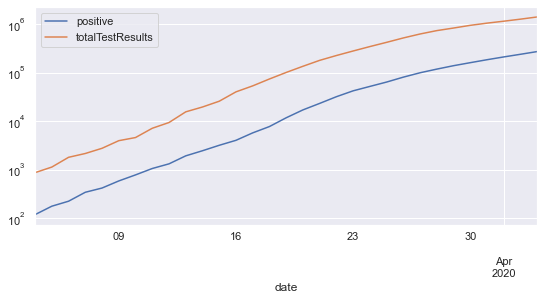

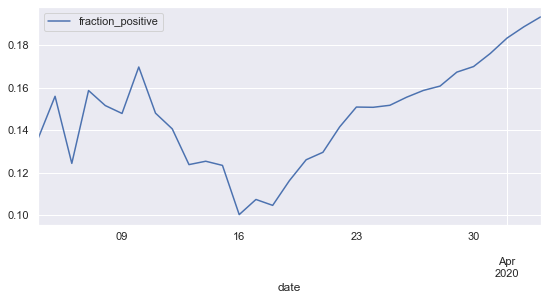

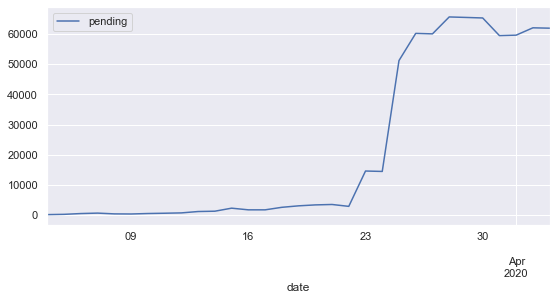

In [10]:
dfus["fraction_positive"] = dfus["positive"]/ dfus["totalTestResults"]
ax = dfus.plot(x="date", y="positive", logy=True, figsize=[9,4])
dfus.plot("date", "totalTestResults", logy=True, ax=ax)
dfus.plot("date", "fraction_positive", figsize=[9,4])
dfus.plot("date", "pending", figsize=[9,4])

### Current measured ratios and percentages

These are based on cases that test postive and test negative (state labs policies vary on this).

In [11]:
print("Current strategies for diagnosis give pos/neg tests ratio of {:.1%}".format(
    dfus.positive.values[-1]/(dfus.totalTestResults.values[-1])))
print("on total tests tracked = {:,}".format(int(dfus.totalTestResults.values[-1])))

Current strategies for diagnosis give pos/neg tests ratio of 19.3%
on total tests tracked = 1,407,344


In [12]:
pos_dr = dfus.death.values[-1]/dfus.positive.values[-1]
print("Current death/positive ratio of {:.1%}".format(pos_dr))

Current death/positive ratio of 2.6%


In [13]:
projections(dfus, dt, pos_dr)
projections(dfus, 2*dt, pos_dr)


US flu death rate average per week = 61,099/52 ≈ 1,174
Using doubling time of 4.42 days
period      date         positive,     deaths              weekly rate
-------------------------------------------------------------------------------------
   0: 2020-04-03 00 h,    271,988 [total deaths  6,962] Death Rate Avg = 1,680 per wk
   1: 2020-04-07 10 h,    543,976 [total deaths 13,924] Death Rate Avg = 2,916 per wk
   2: 2020-04-11 20 h,  1,087,952 [total deaths 27,848] Death Rate Avg = 5,151 per wk
   3: 2020-04-16 06 h,  2,175,904 [total deaths 55,696] Death Rate Avg = 9,225 per wk

US flu death rate average per week = 61,099/52 ≈ 1,174
Using doubling time of 8.84 days
period      date         positive,     deaths              weekly rate
-------------------------------------------------------------------------------------
   0: 2020-04-03 00 h,    271,988 [total deaths  6,962] Death Rate Avg = 1,680 per wk
   1: 2020-04-11 20 h,    543,976 [total deaths 13,924] Death Rate Avg = 2,575

### State Trends and Doubling Periods

State=NY  (last_update=2020-04-03T11:00)
Doubling every 5.3 days based on last 10 days of data
(naive estimates: current_unresolved=77198 hosp=11579 icu=3087)


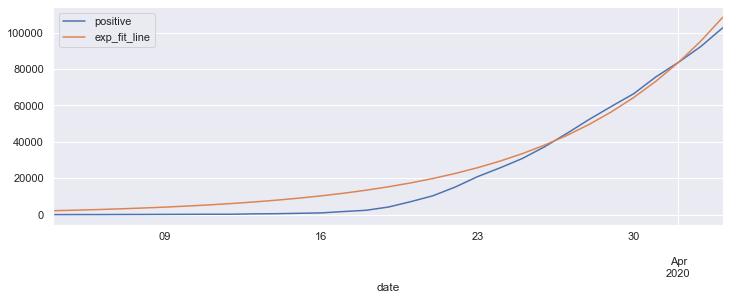

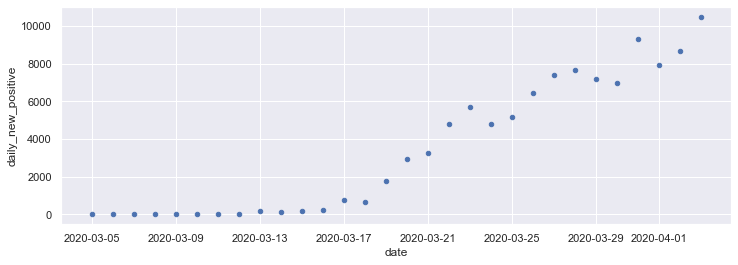

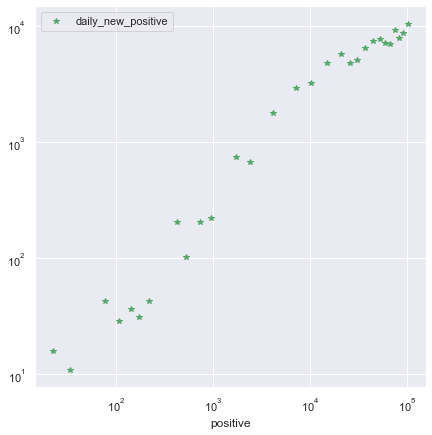

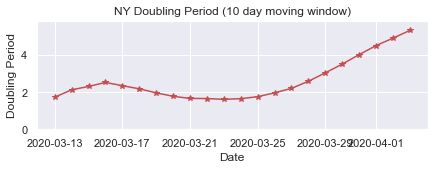

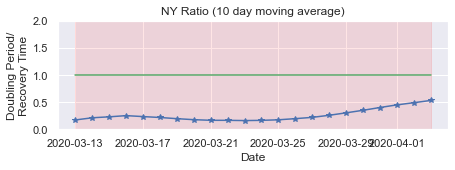

State=NJ  (last_update=2020-04-03T13:00)
Doubling every 3.48 days based on last 10 days of data
(naive estimates: current_unresolved=26220 hosp=3933 icu=1048)


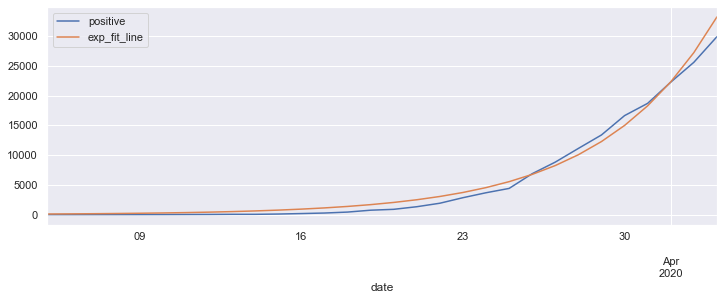

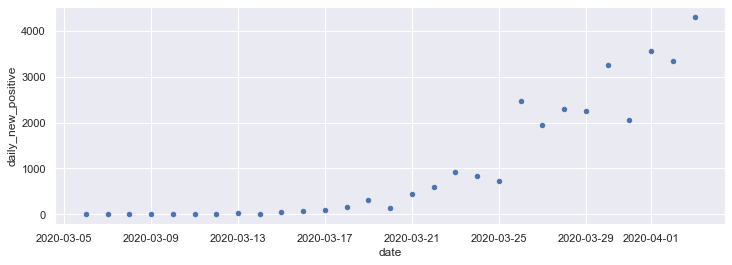

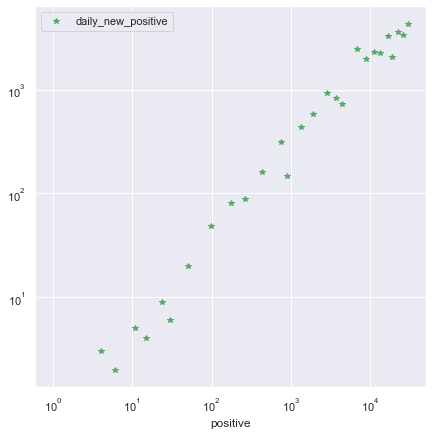

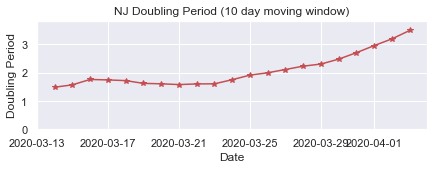

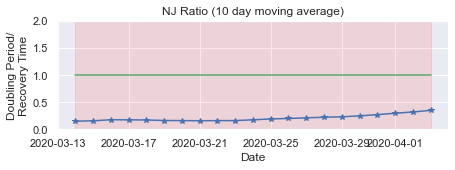

State=MI  (last_update=2020-04-03T11:00)
Doubling every 3.6 days based on last 10 days of data
(naive estimates: current_unresolved=10953 hosp=1642 icu=438)


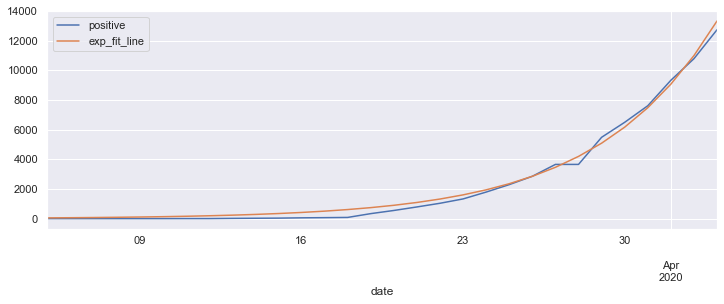

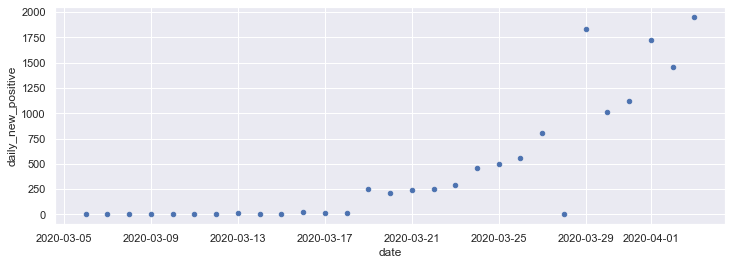

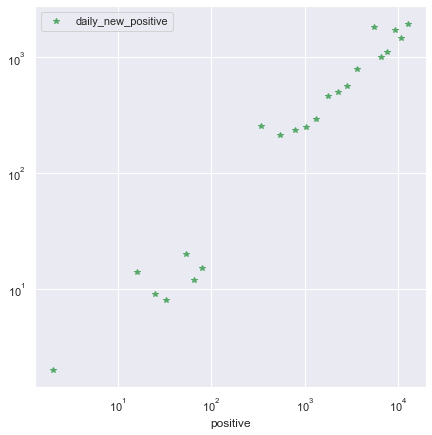

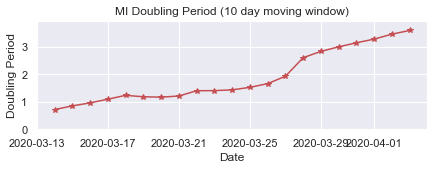

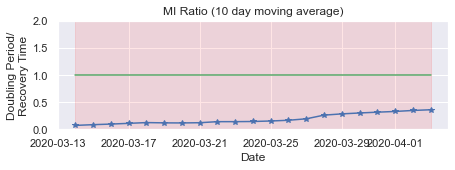

State=CA  (last_update=2020-04-02T00:00)
Doubling every 4.28 days based on last 10 days of data
(naive estimates: current_unresolved=8599 hosp=1289 icu=343)


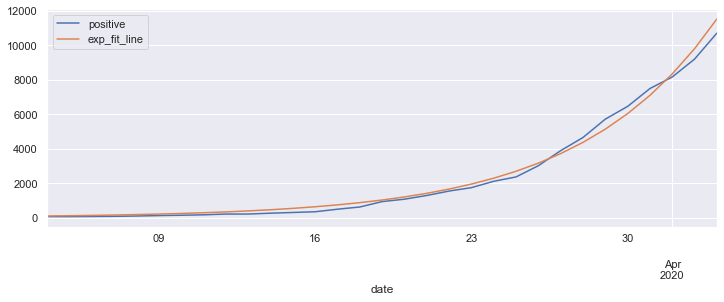

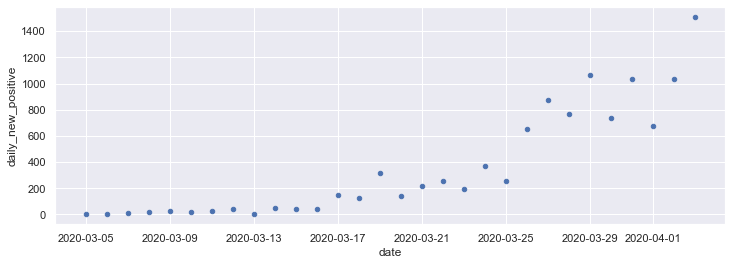

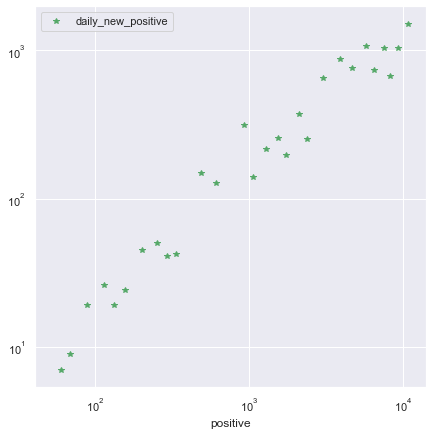

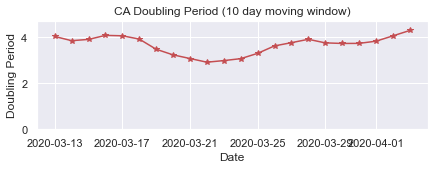

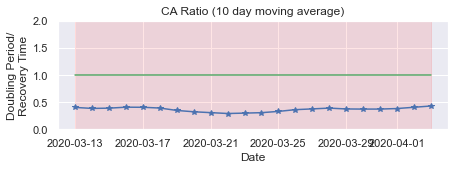

State=MA  (last_update=2020-04-03T12:30)
Doubling every 3.74 days based on last 10 days of data
(naive estimates: current_unresolved=9243 hosp=1386 icu=369)


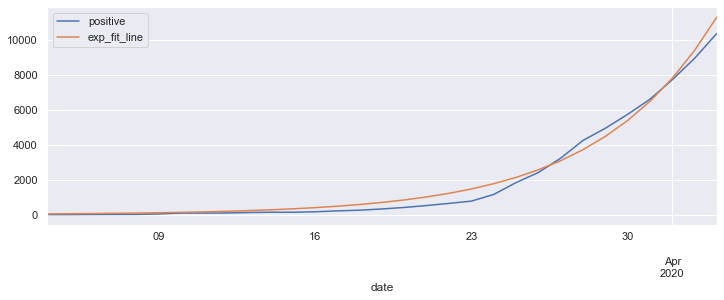

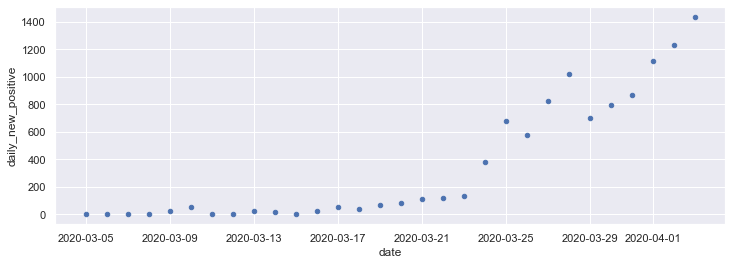

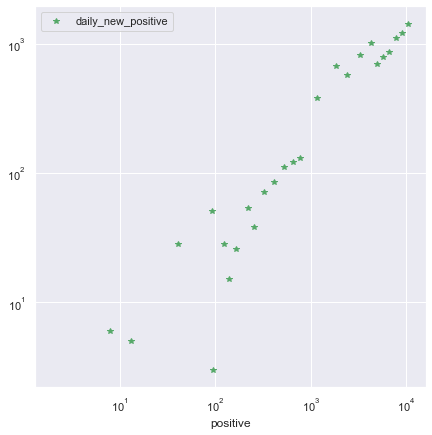

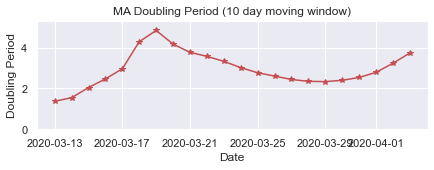

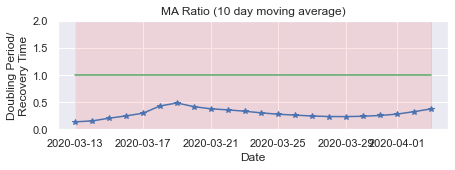

State=LA  (last_update=2020-04-03T13:00)
Doubling every 3.67 days based on last 10 days of data
(naive estimates: current_unresolved=8909 hosp=1336 icu=356)


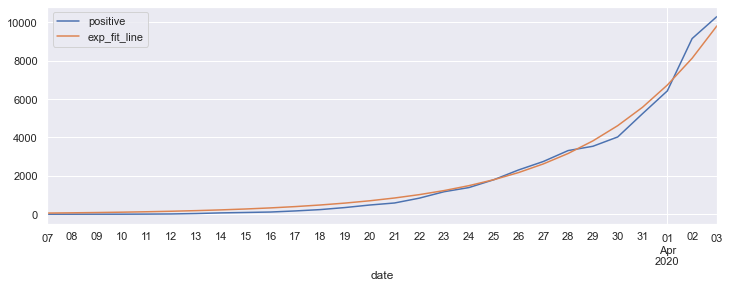

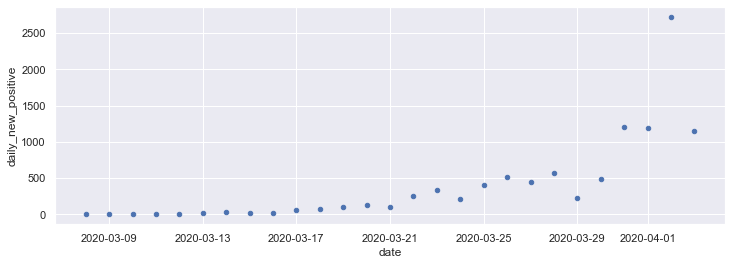

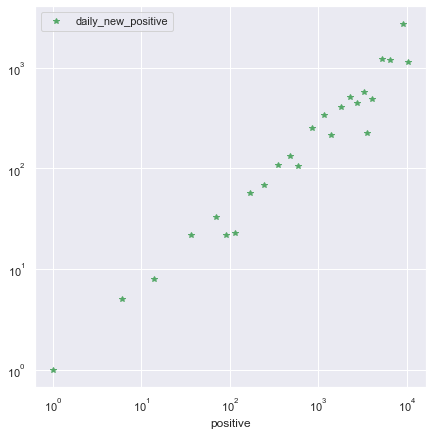

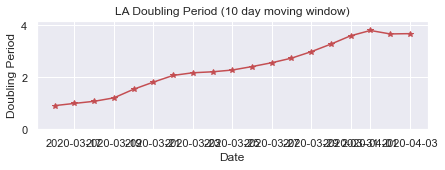

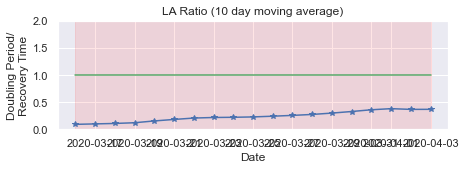

State=FL  (last_update=2020-04-03T17:17)
Doubling every 3.73 days based on last 10 days of data
(naive estimates: current_unresolved=8173 hosp=1225 icu=326)


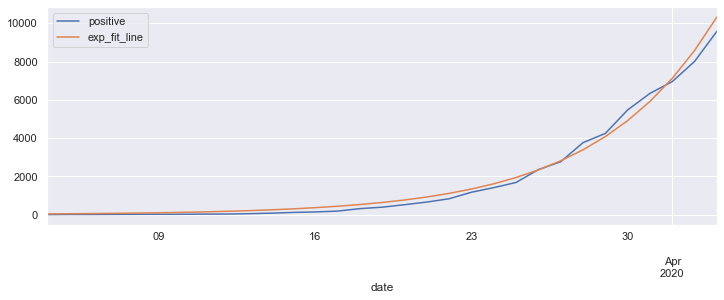

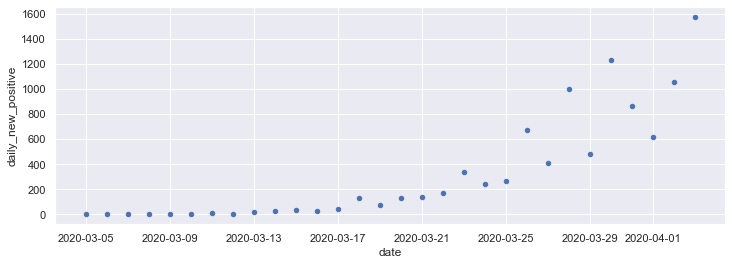

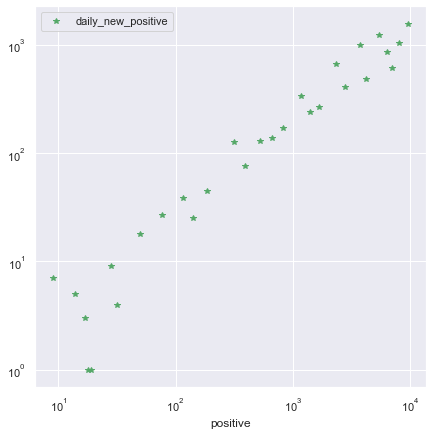

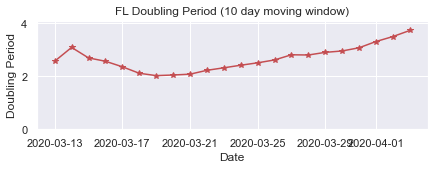

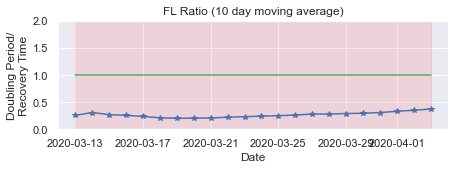

State=IL  (last_update=2020-04-03T00:00)
Doubling every 4.12 days based on last 10 days of data
(naive estimates: current_unresolved=7369 hosp=1105 icu=294)


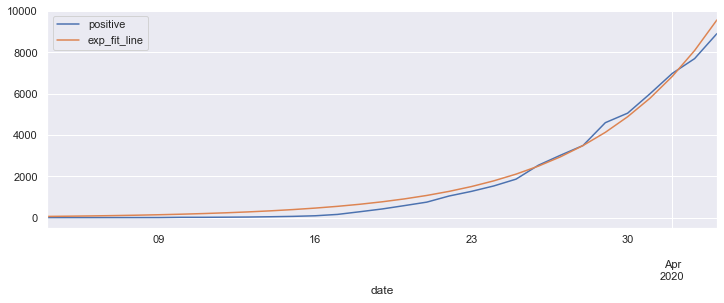

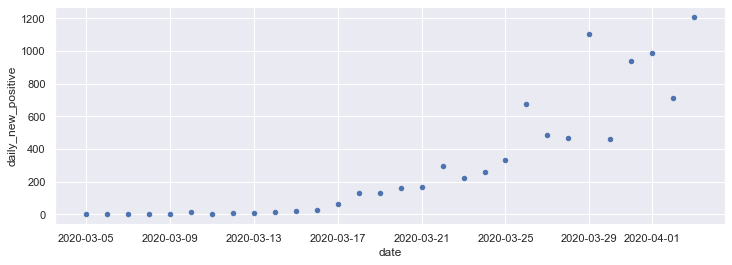

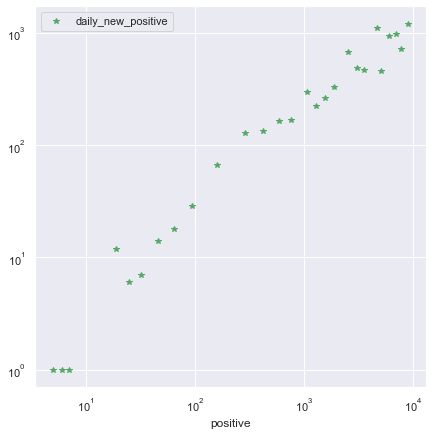

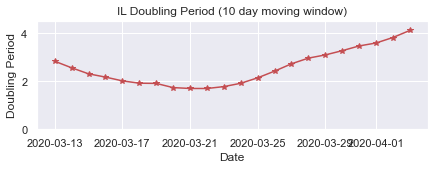

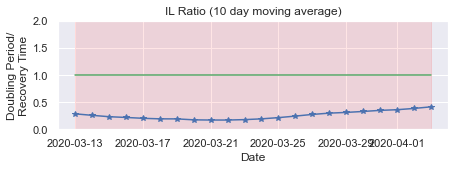

State=PA  (last_update=2020-04-03T12:00)
Doubling every 3.29 days based on last 10 days of data
(naive estimates: current_unresolved=7569 hosp=1135 icu=302)


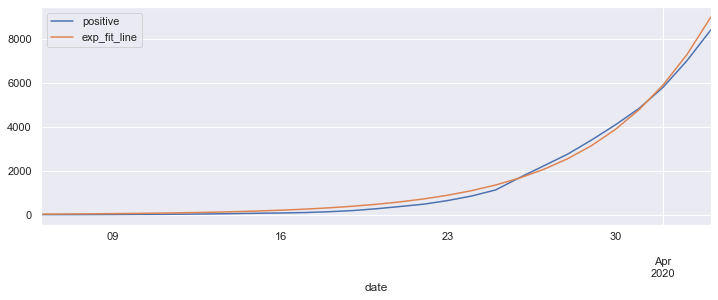

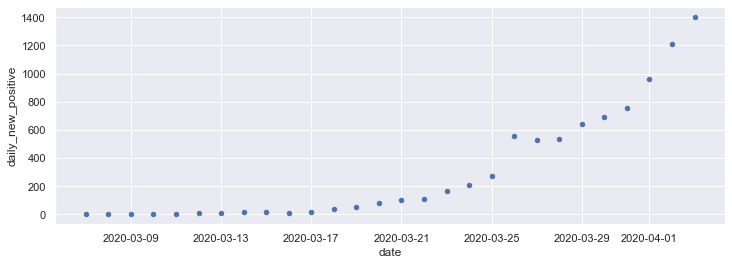

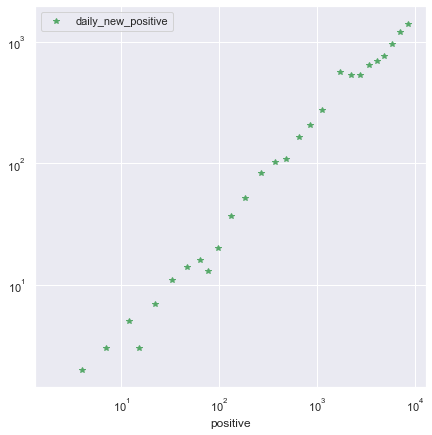

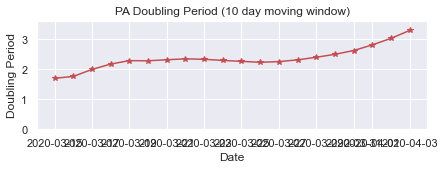

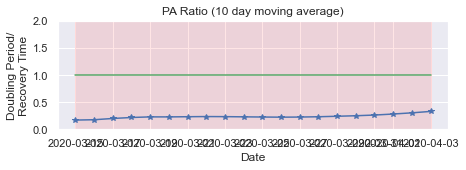

State=WA  (last_update=2020-04-03T18:55)
Doubling every 6.19 days based on last 10 days of data
(naive estimates: current_unresolved=4364 hosp=654 icu=174)


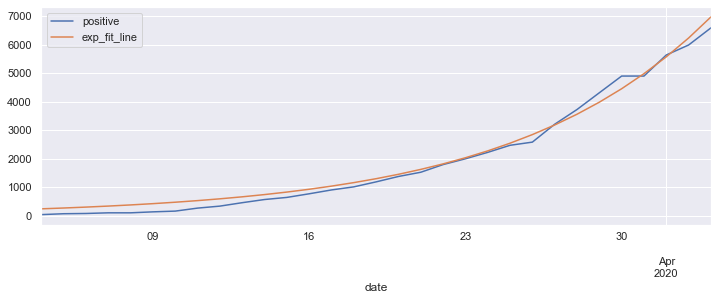

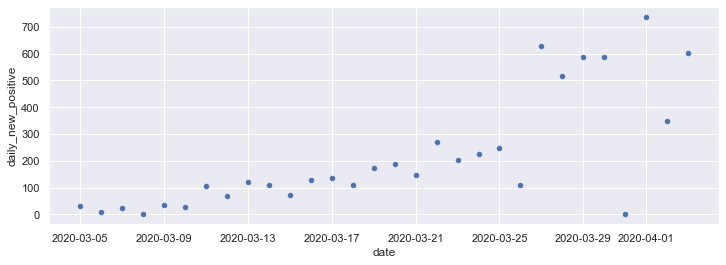

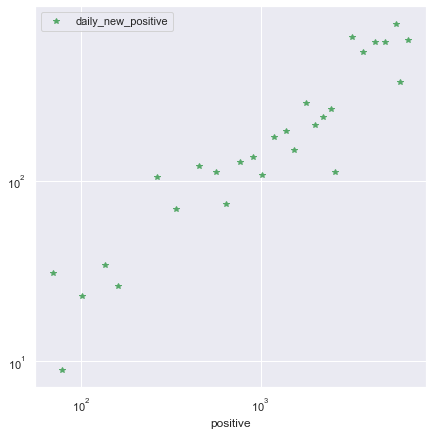

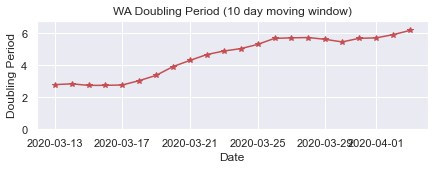

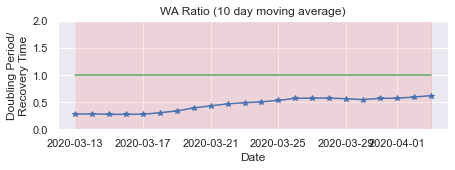

State=GA  (last_update=2020-04-03T18:28)
Doubling every 4.02 days based on last 10 days of data
(naive estimates: current_unresolved=4805 hosp=720 icu=192)


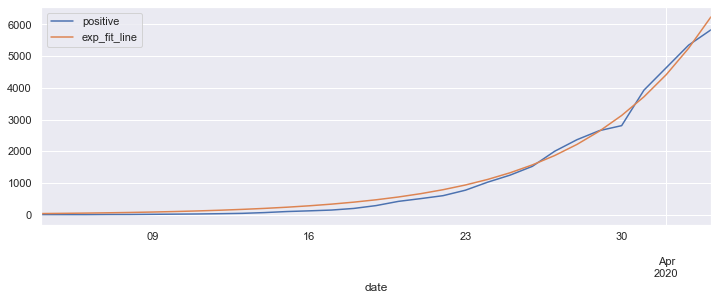

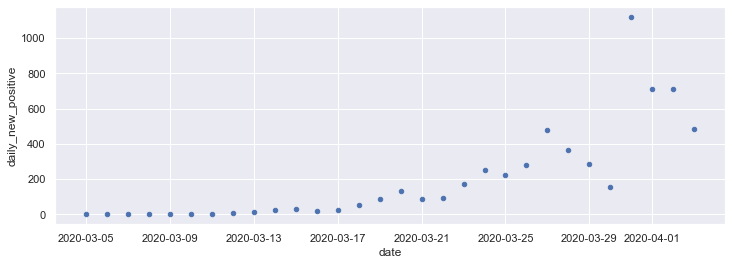

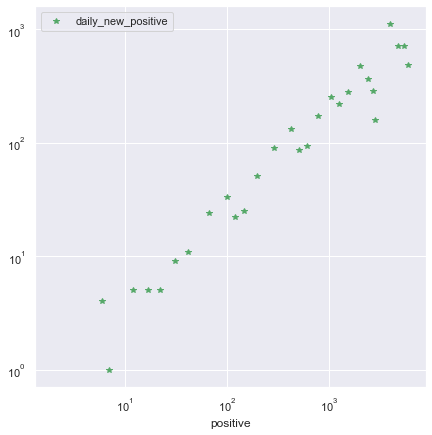

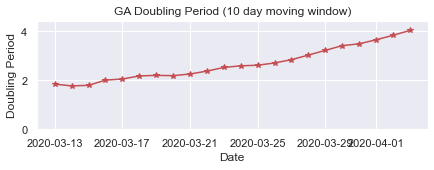

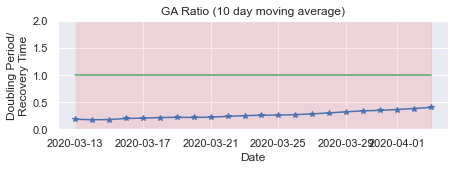

State=TX  (last_update=2020-04-02T21:00)
Doubling every 3.88 days based on last 10 days of data
(naive estimates: current_unresolved=4920 hosp=738 icu=196)


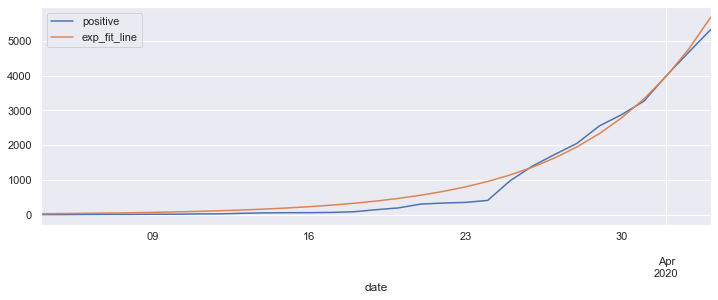

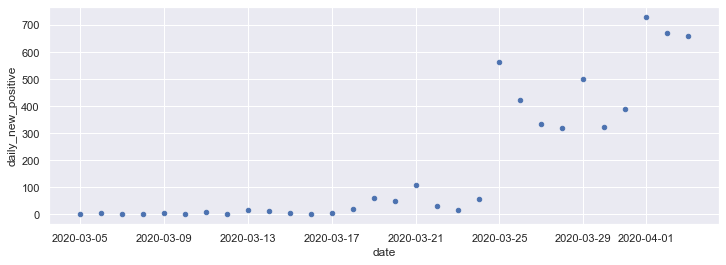

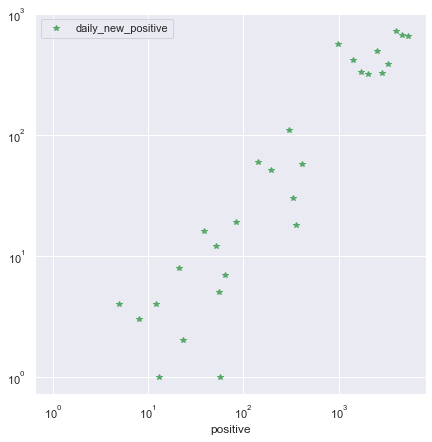

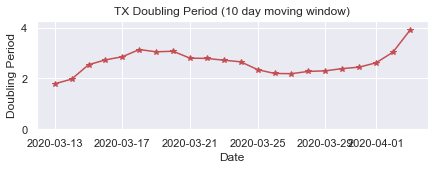

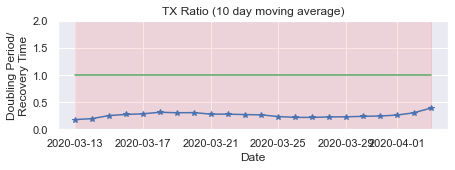

State=CT  (last_update=2020-04-03T19:00)
Doubling every 3.49 days based on last 10 days of data
(naive estimates: current_unresolved=4296 hosp=644 icu=171)


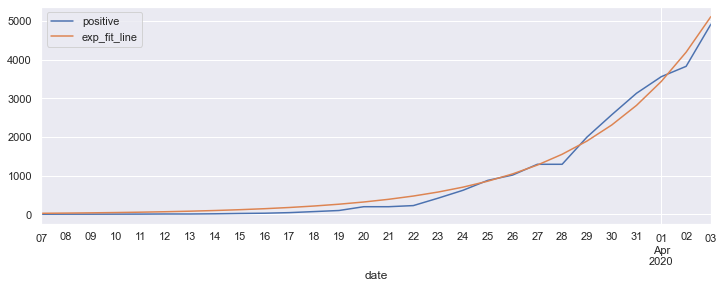

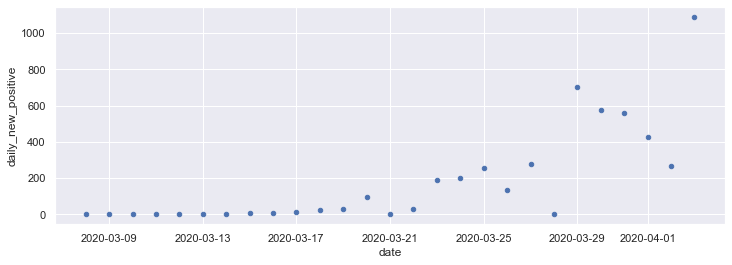

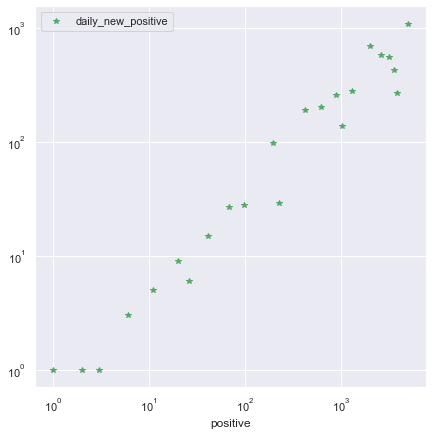

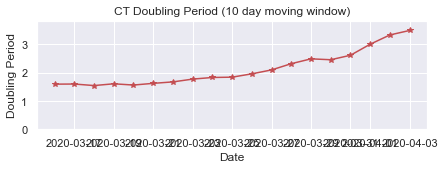

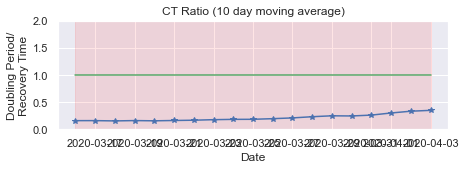

State=CO  (last_update=2020-04-03T00:00)
Doubling every 4.45 days based on last 10 days of data
(naive estimates: current_unresolved=3008 hosp=451 icu=120)


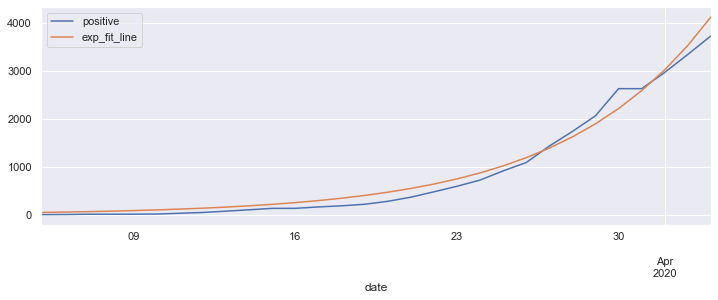

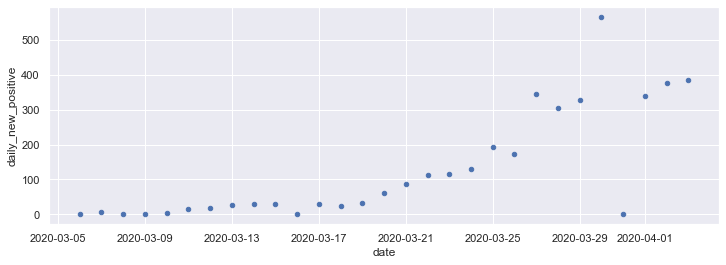

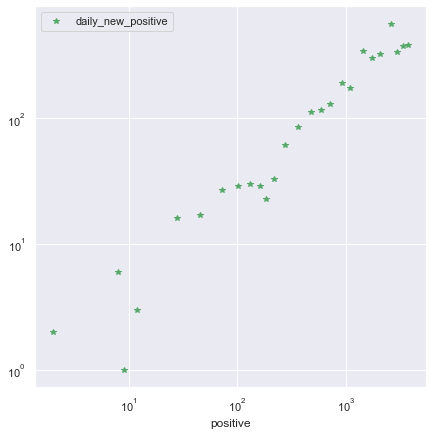

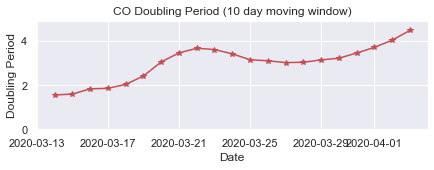

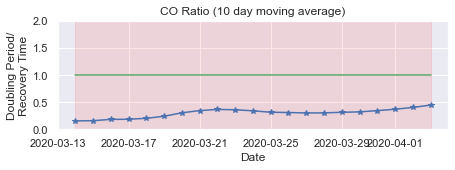

State=IN  (last_update=2020-04-02T23:59)
Doubling every 3.24 days based on last 10 days of data
(naive estimates: current_unresolved=3072 hosp=460 icu=122)


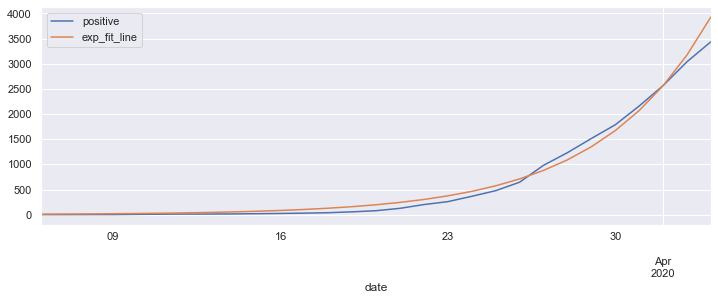

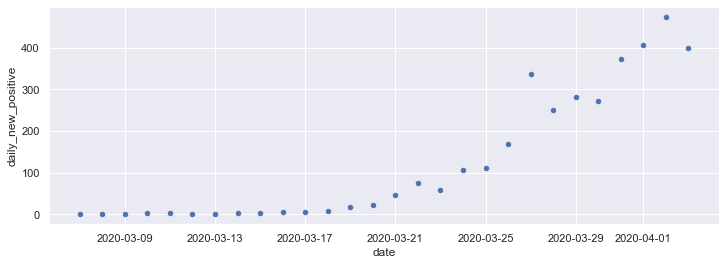

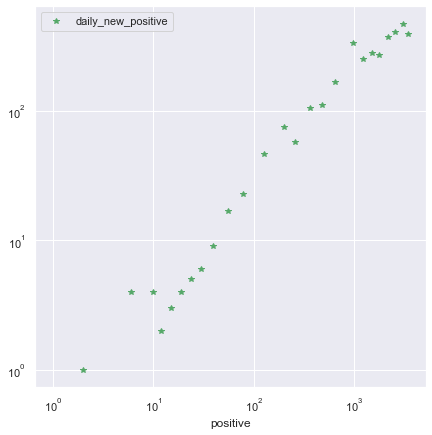

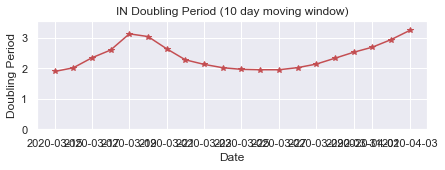

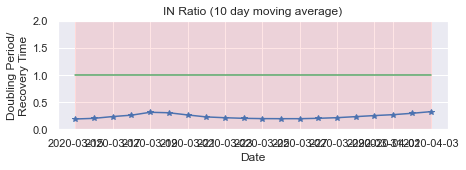

State=OH  (last_update=2020-04-03T14:00)
Doubling every 4.1 days based on last 10 days of data
(naive estimates: current_unresolved=2748 hosp=412 icu=109)


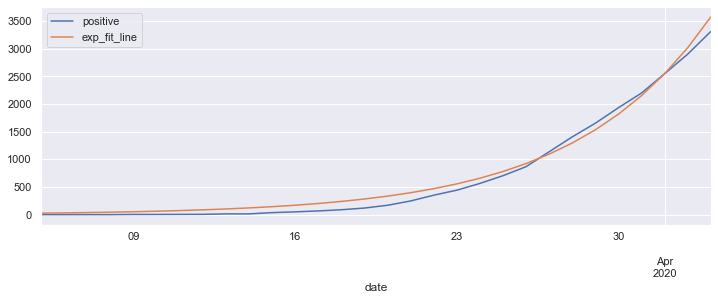

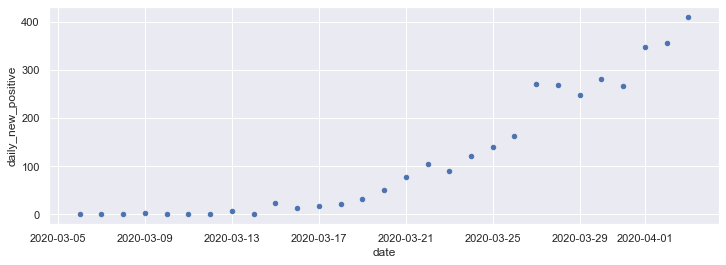

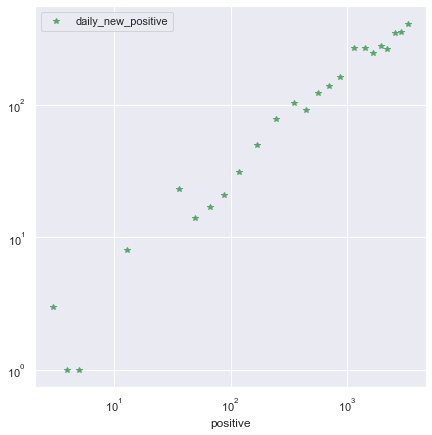

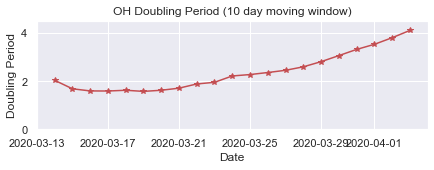

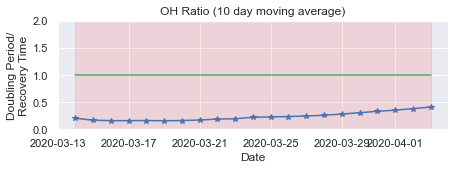

State=TN  (last_update=2020-04-03T15:00)
Doubling every 4.48 days based on last 10 days of data
(naive estimates: current_unresolved=2400 hosp=360 icu=96)


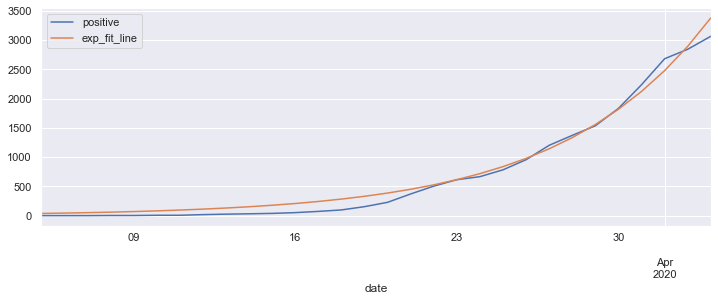

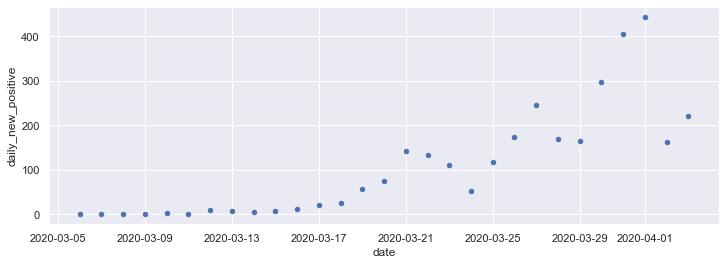

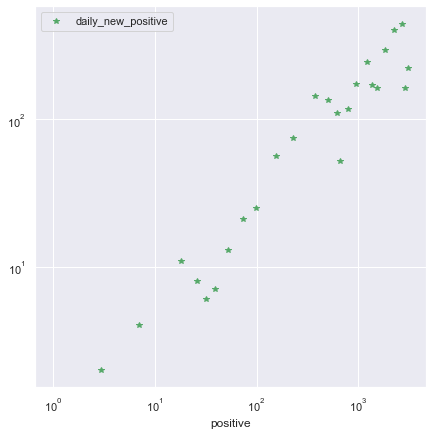

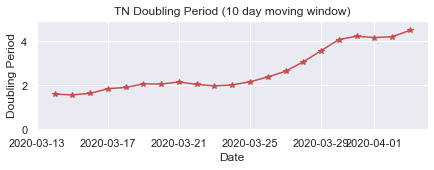

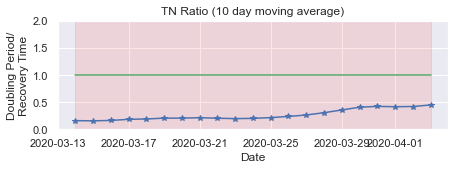

State=MD  (last_update=2020-04-03T10:00)
Doubling every 3.47 days based on last 10 days of data
(naive estimates: current_unresolved=2409 hosp=361 icu=96)


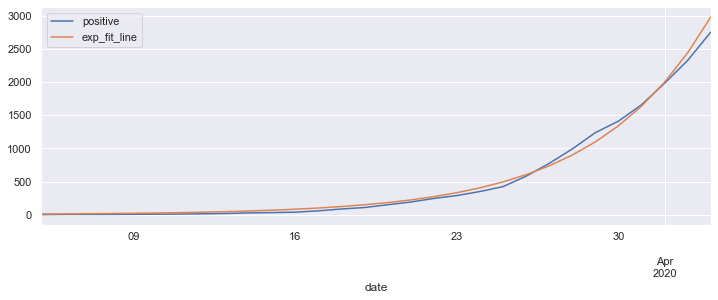

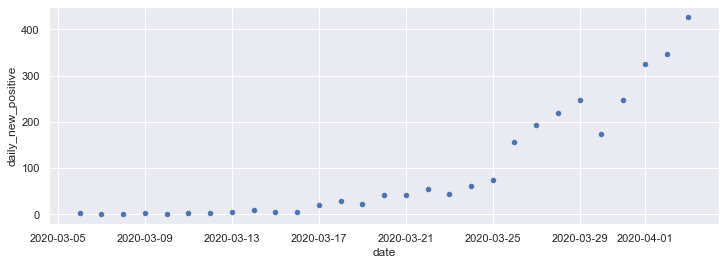

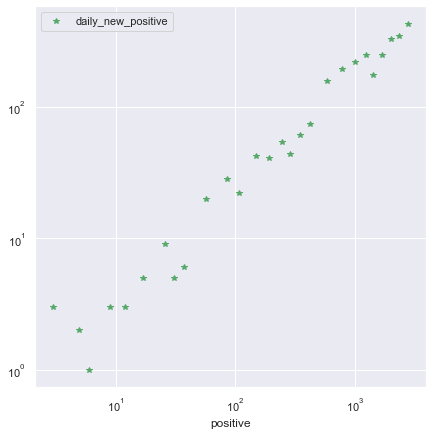

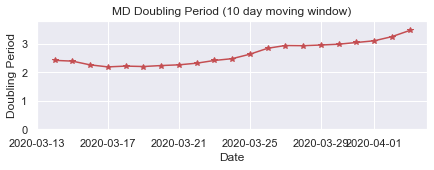

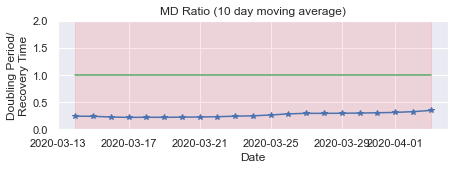

State=MO  (last_update=2020-04-03T15:00)
Doubling every 3.69 days based on last 10 days of data
(naive estimates: current_unresolved=1930 hosp=289 icu=77)


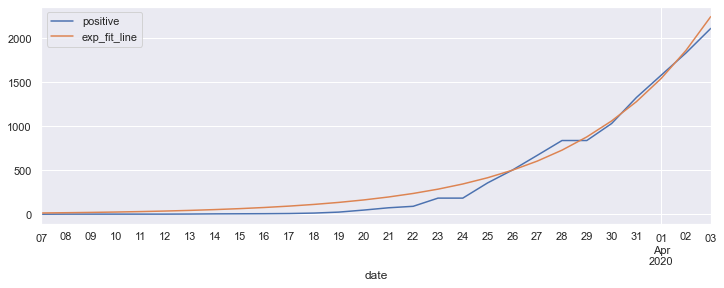

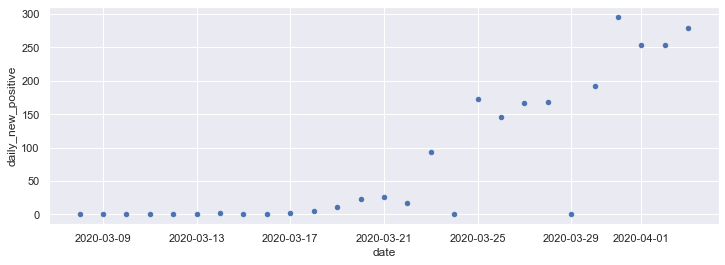

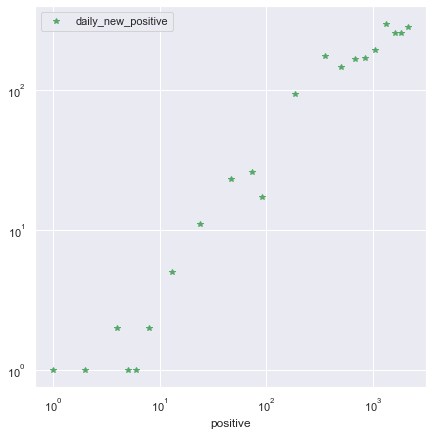

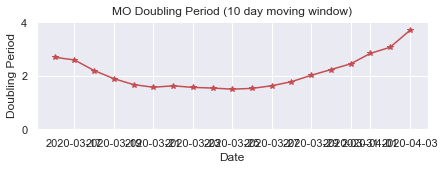

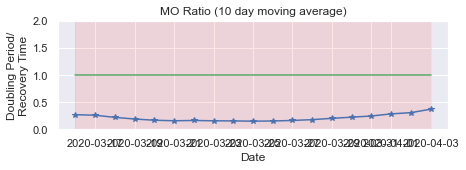

State=NC  (last_update=2020-04-03T13:55)
Doubling every 4.47 days based on last 10 days of data
(naive estimates: current_unresolved=1695 hosp=254 icu=67)


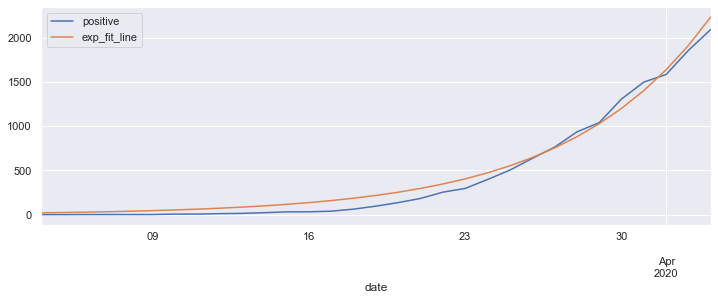

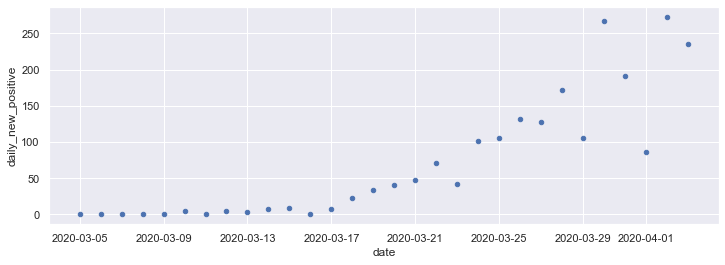

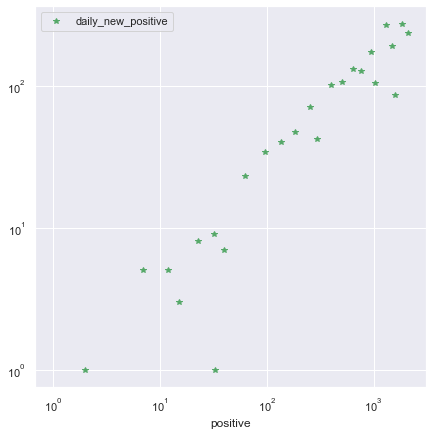

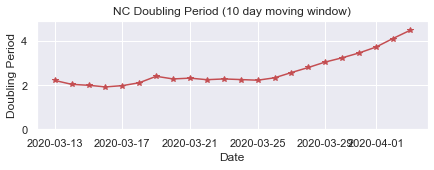

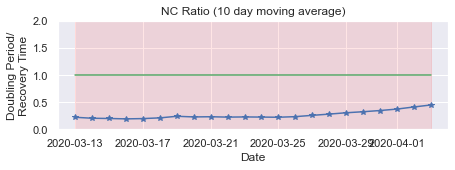

State=VA  (last_update=2020-04-03T09:00)
Doubling every 3.8 days based on last 10 days of data
(naive estimates: current_unresolved=1722 hosp=258 icu=68)


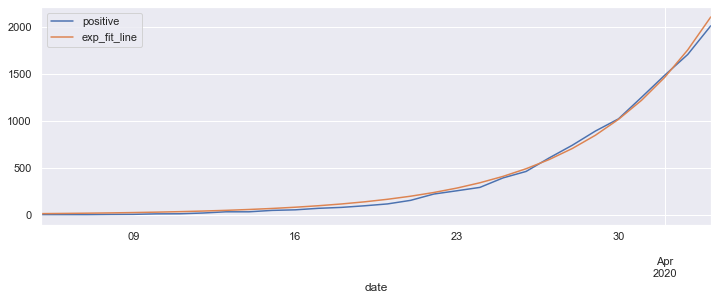

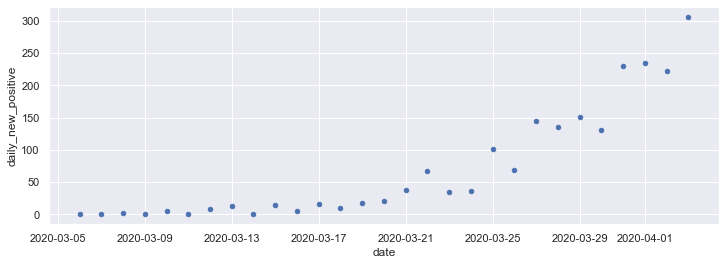

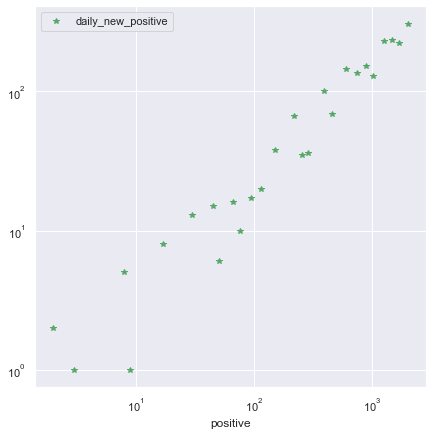

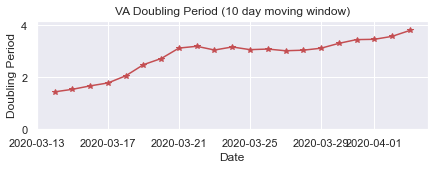

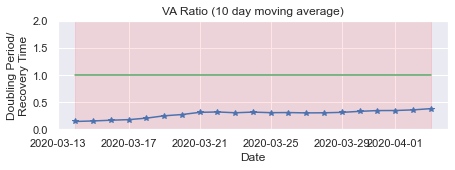

State=WI  (last_update=2020-04-03T04:00)
Doubling every 5.45 days based on last 10 days of data
(naive estimates: current_unresolved=1455 hosp=218 icu=58)


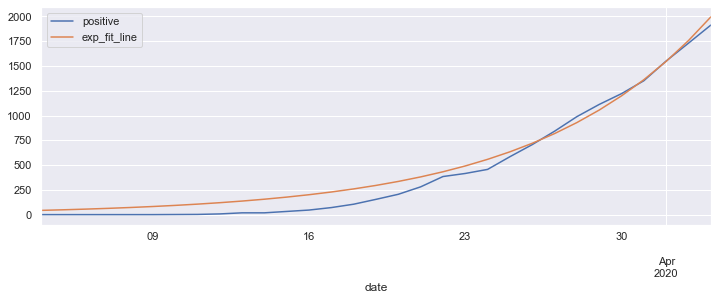

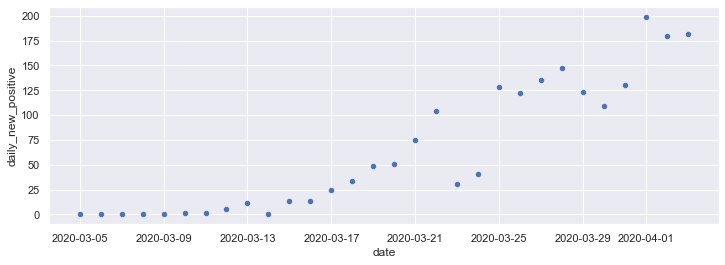

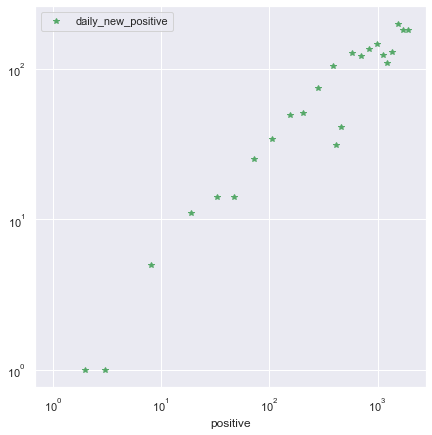

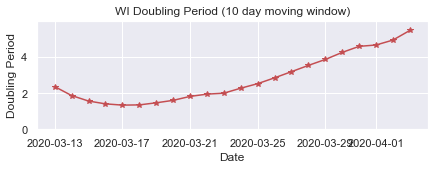

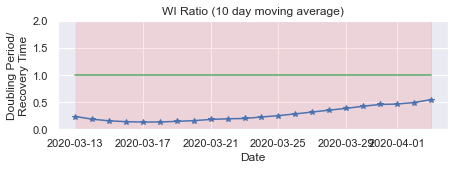

State=AZ  (last_update=2020-04-03T00:00)
Doubling every 4.74 days based on last 10 days of data
(naive estimates: current_unresolved=1412 hosp=211 icu=56)


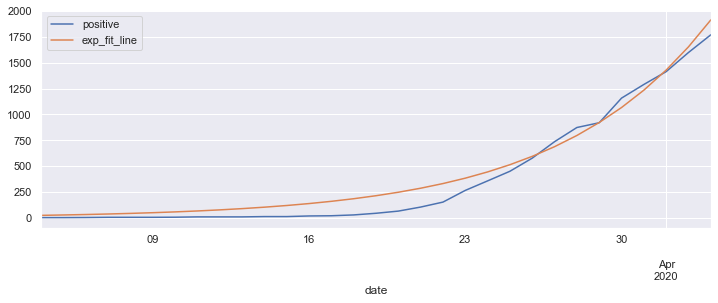

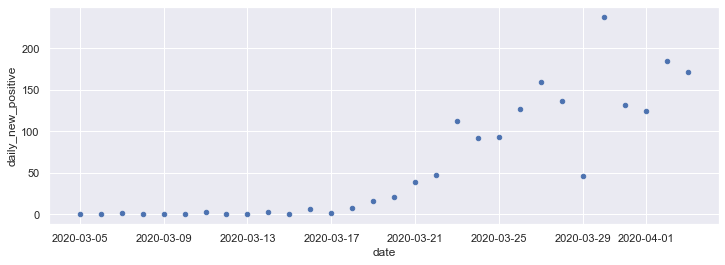

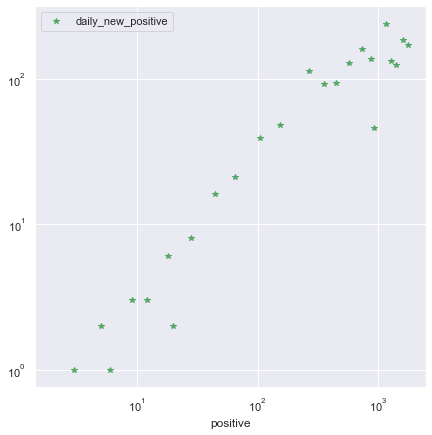

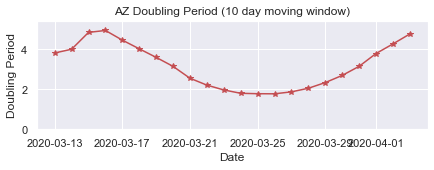

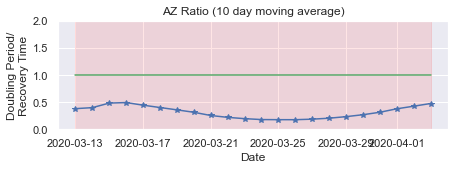

State=SC  (last_update=2020-04-03T16:55)
Doubling every 4.12 days based on last 10 days of data
(naive estimates: current_unresolved=1256 hosp=188 icu=50)


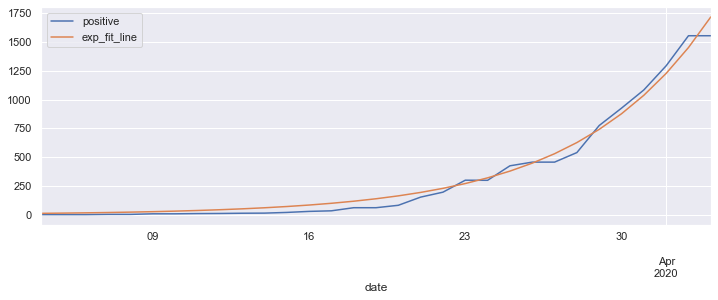

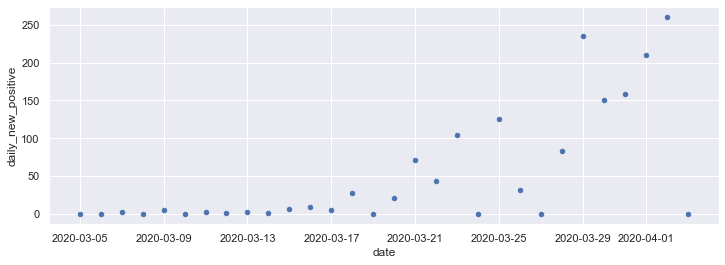

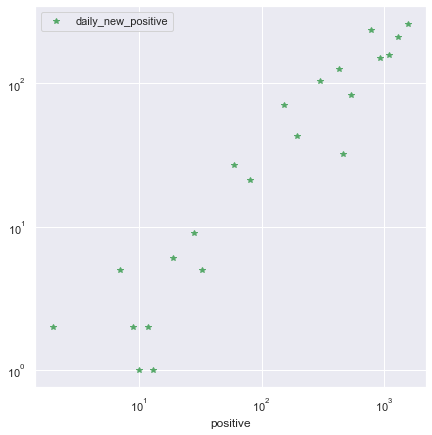

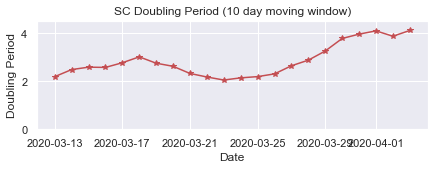

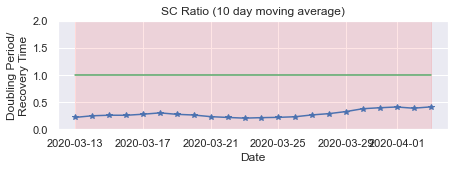

State=AL  (last_update=2020-04-03T00:00)
Doubling every 4.58 days based on last 10 days of data
(naive estimates: current_unresolved=1217 hosp=182 icu=48)


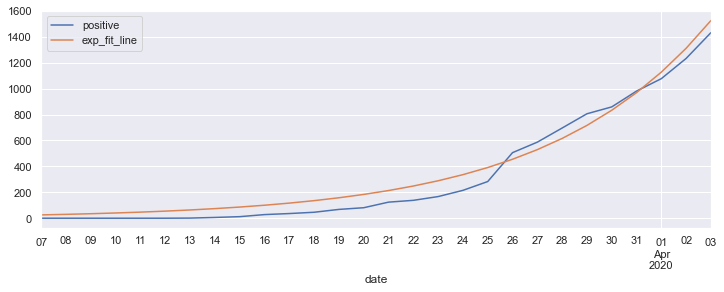

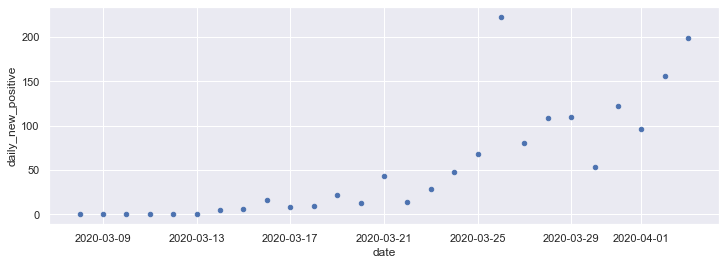

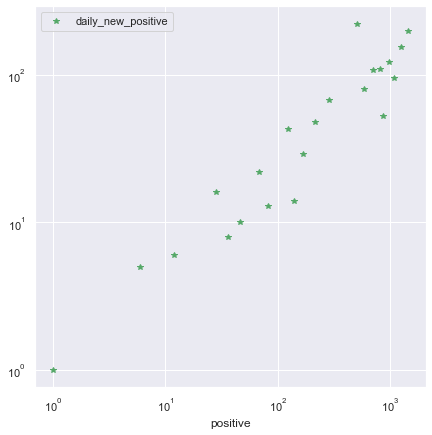

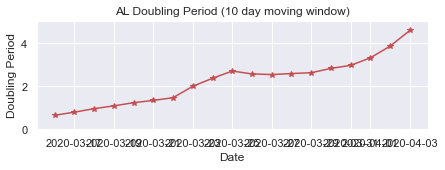

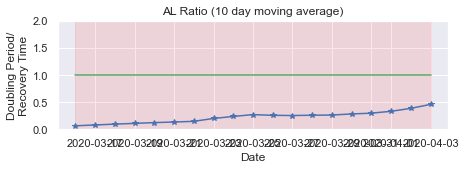

State=NV  (last_update=2020-04-03T12:00)
Doubling every 3.93 days based on last 10 days of data
(naive estimates: current_unresolved=1236 hosp=185 icu=49)


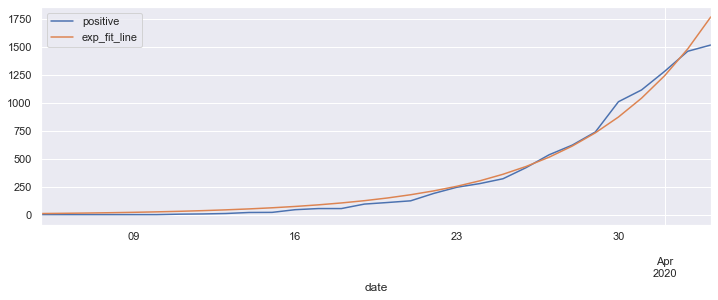

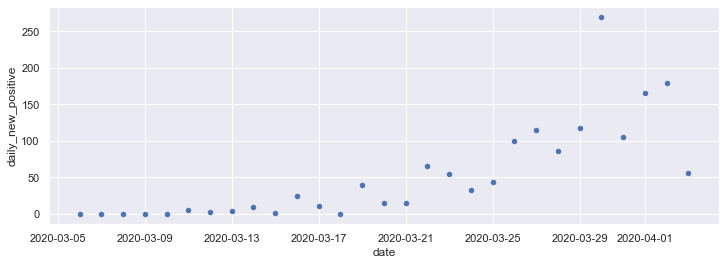

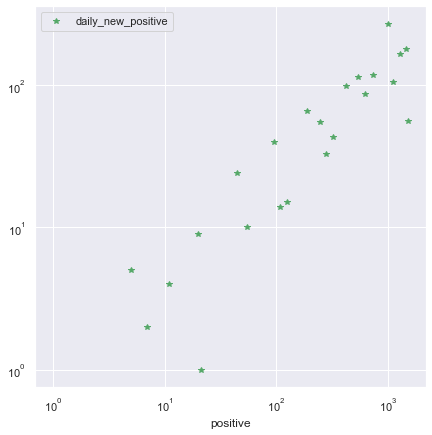

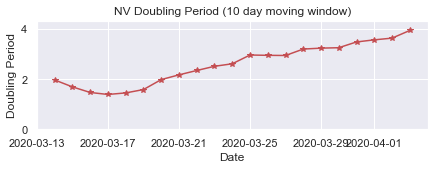

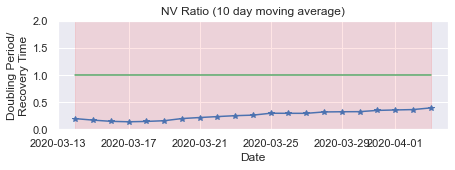

State=MS  (last_update=2020-04-02T19:00)
Doubling every 5.2 days based on last 10 days of data
(naive estimates: current_unresolved=1038 hosp=155 icu=41)


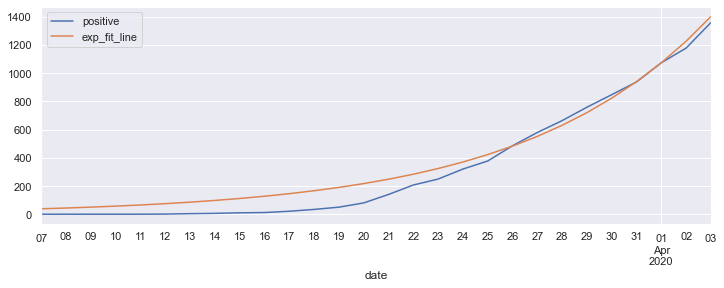

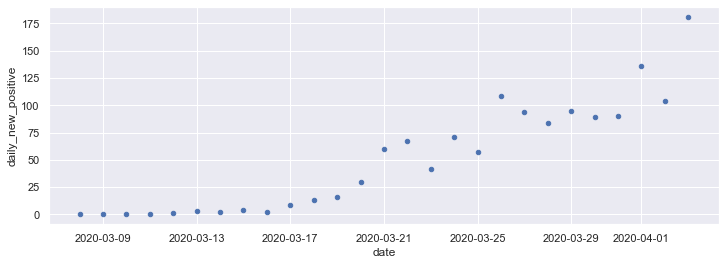

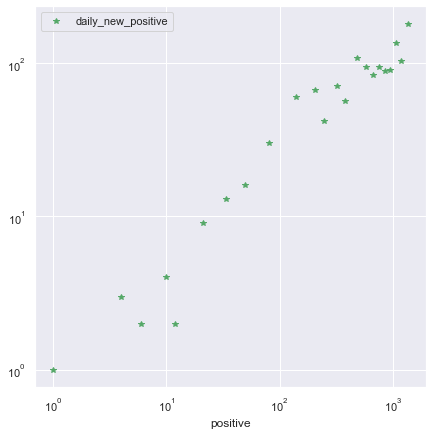

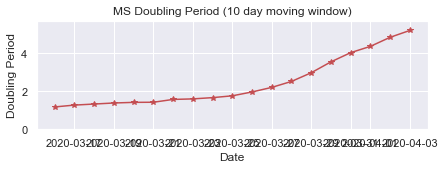

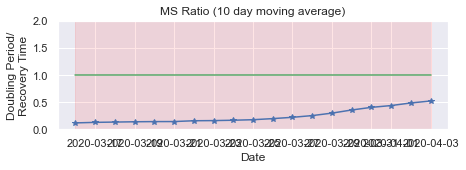

State=UT  (last_update=2020-04-03T15:00)
Doubling every 4.88 days based on last 10 days of data
(naive estimates: current_unresolved=947 hosp=142 icu=37)


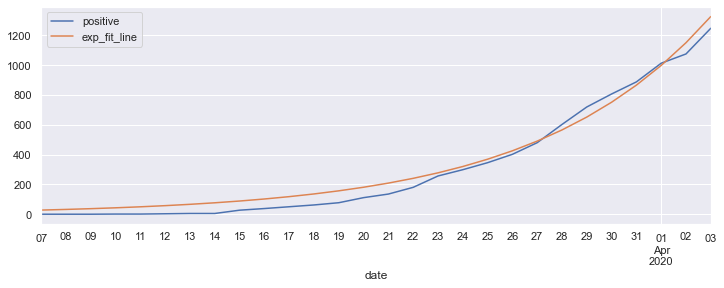

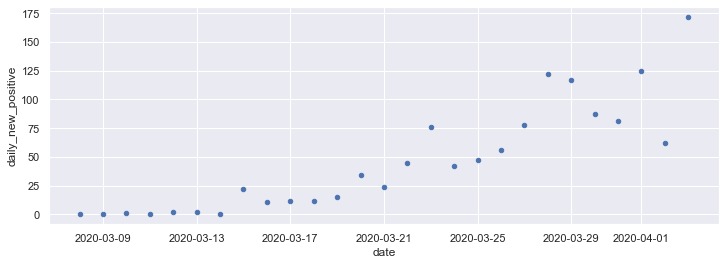

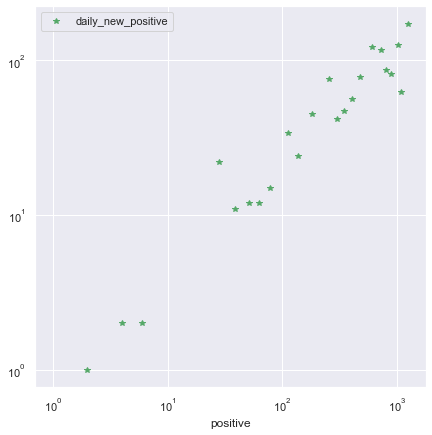

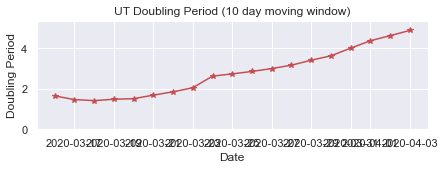

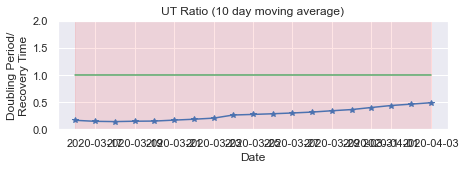

State=ID  (last_update=2020-04-03T19:00)
Doubling every 2.76 days based on last 10 days of data
(naive estimates: current_unresolved=841 hosp=126 icu=33)


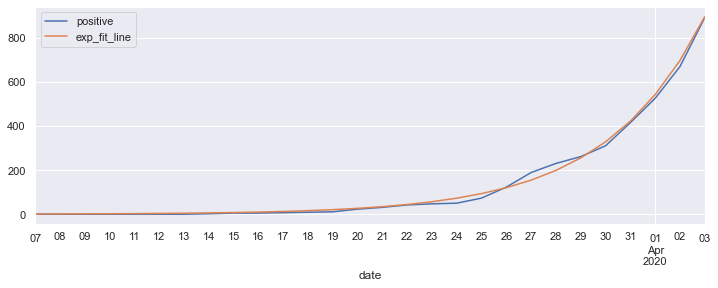

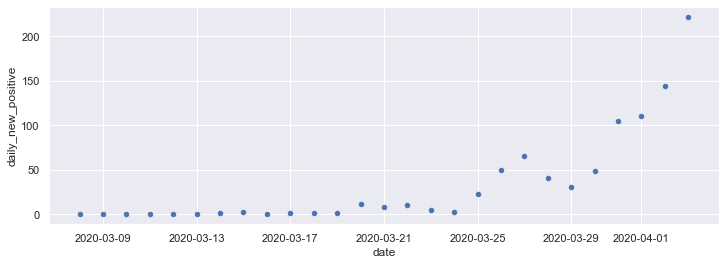

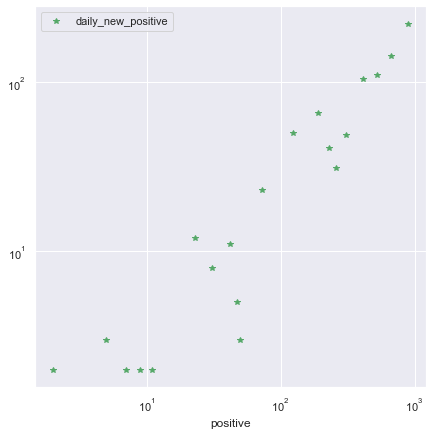

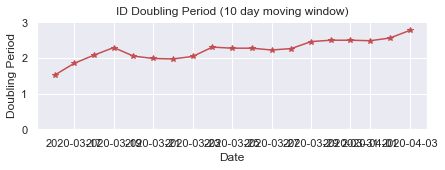

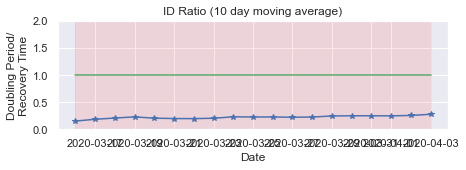

State=OK  (last_update=2020-04-03T08:00)
Doubling every 3.77 days based on last 10 days of data
(naive estimates: current_unresolved=882 hosp=132 icu=35)


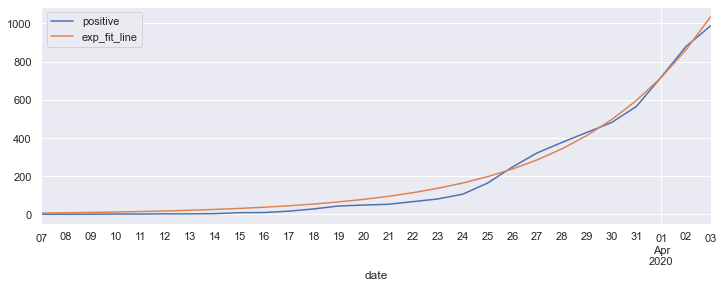

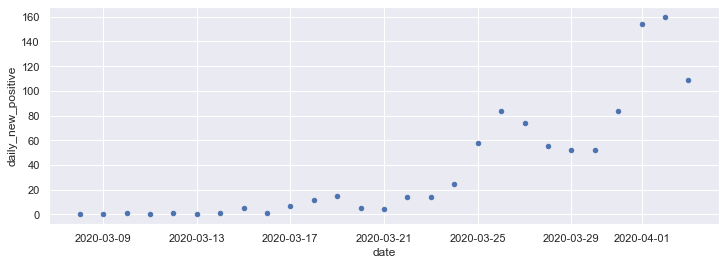

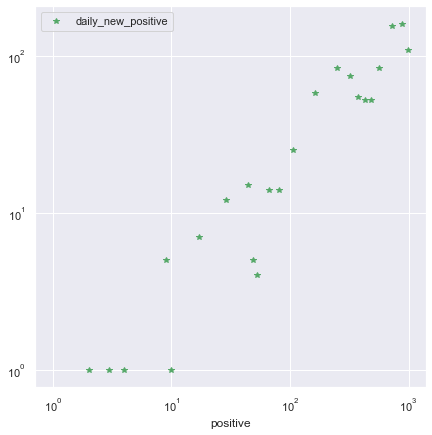

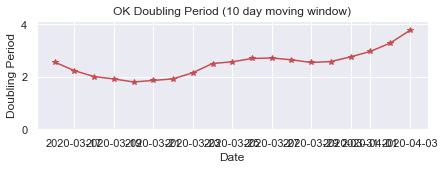

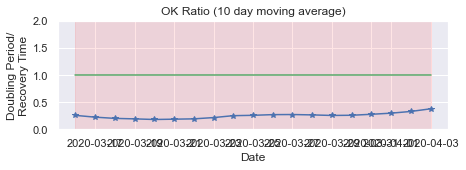

State=OR  (last_update=2020-04-03T12:00)
Doubling every 4.83 days based on last 10 days of data
(naive estimates: current_unresolved=690 hosp=103 icu=27)


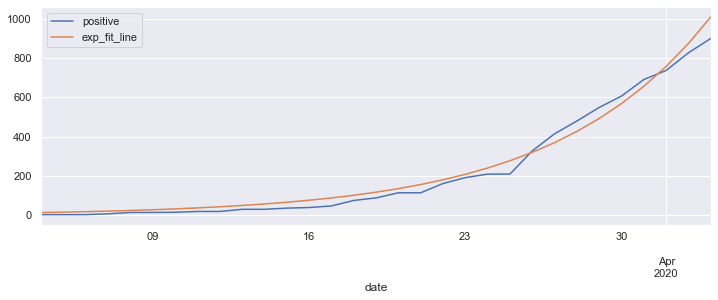

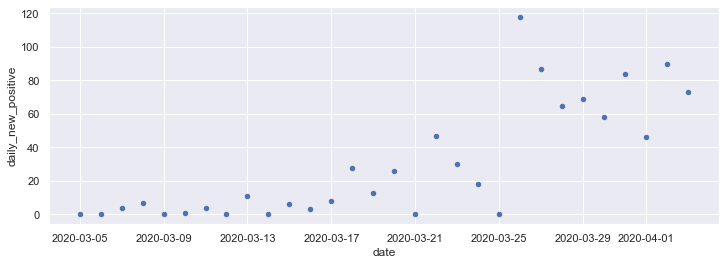

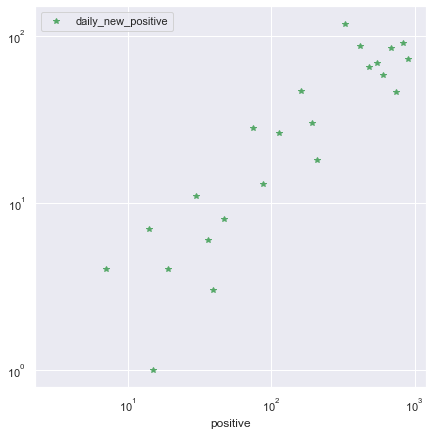

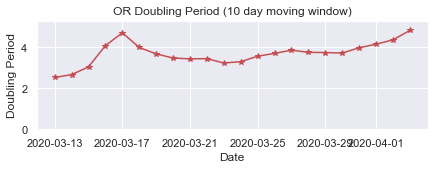

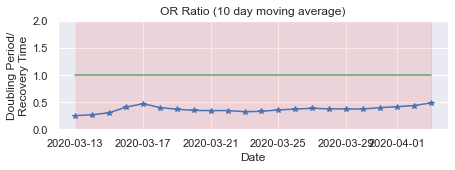

State=KY  (last_update=2020-04-03T17:00)
Doubling every 3.97 days based on last 10 days of data
(naive estimates: current_unresolved=646 hosp=96 icu=25)


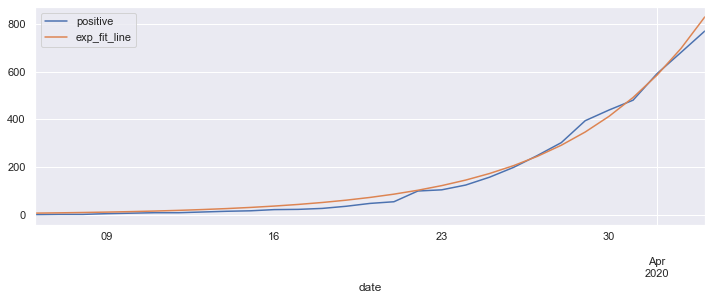

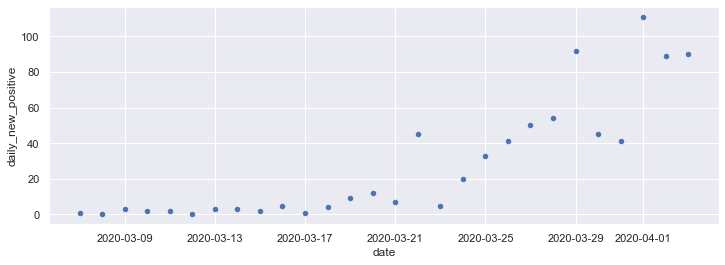

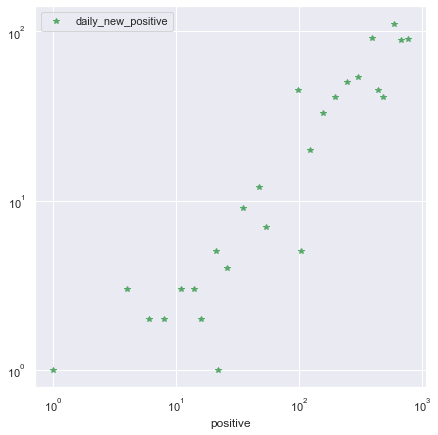

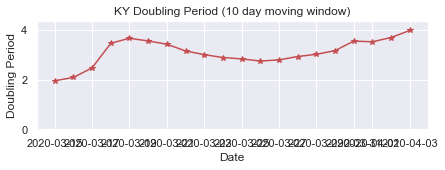

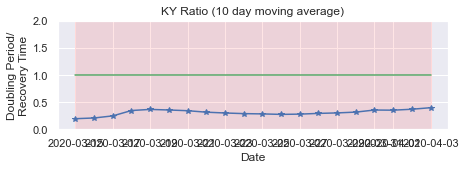

State=MN  (last_update=2020-04-02T17:00)
Doubling every 6.22 days based on last 10 days of data
(naive estimates: current_unresolved=527 hosp=79 icu=21)


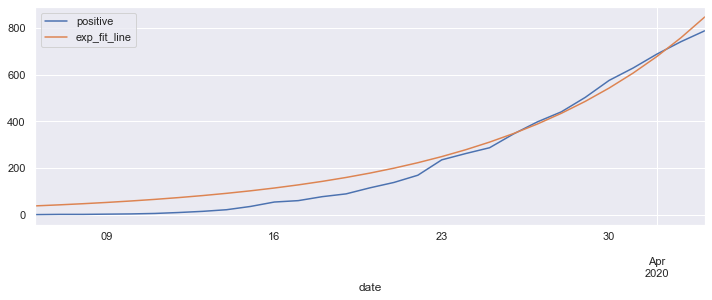

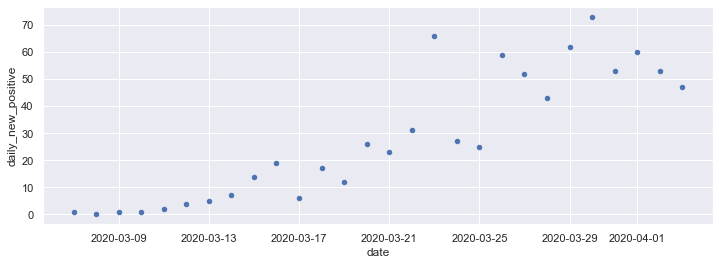

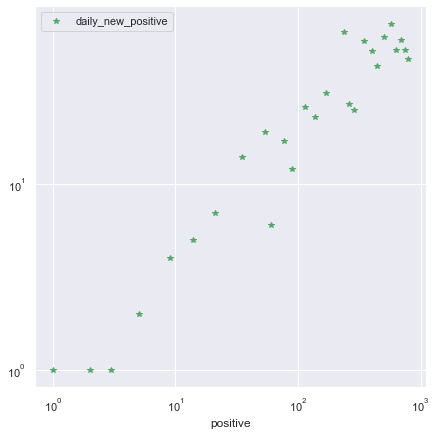

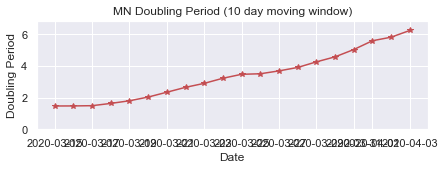

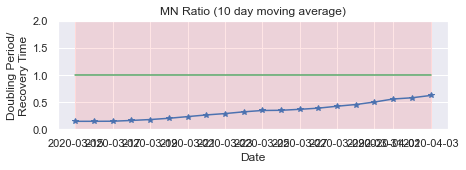

State=DC  (last_update=2020-04-03T00:00)
Doubling every 4.47 days based on last 10 days of data
(naive estimates: current_unresolved=620 hosp=93 icu=24)


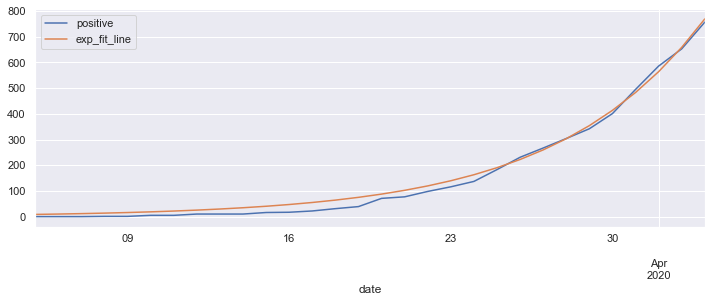

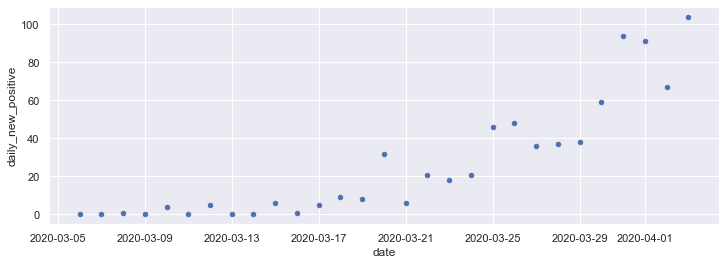

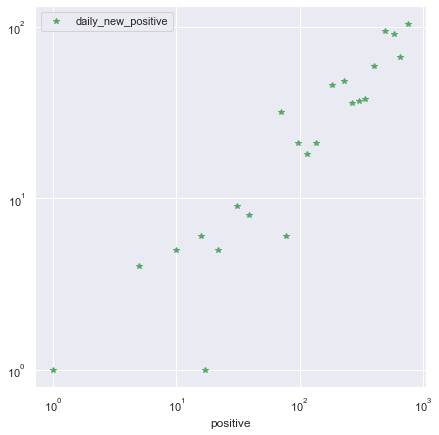

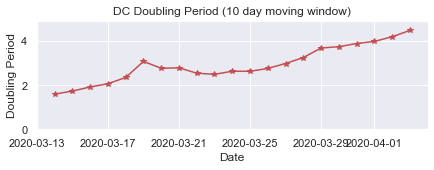

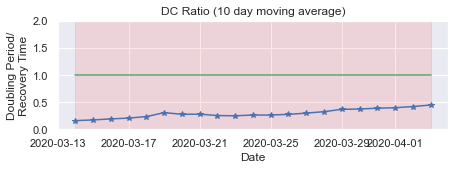

State=AR  (last_update=2020-04-03T23:00)
Doubling every 7.2 days based on last 10 days of data
(naive estimates: current_unresolved=486 hosp=72 icu=19)


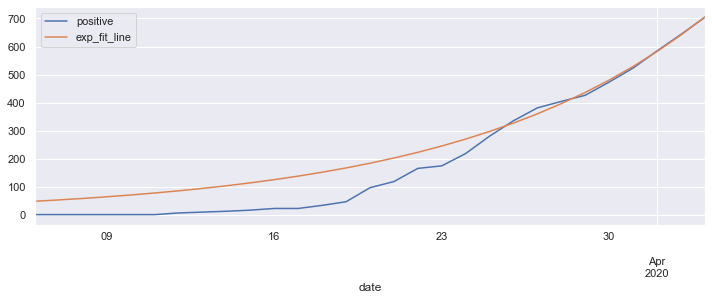

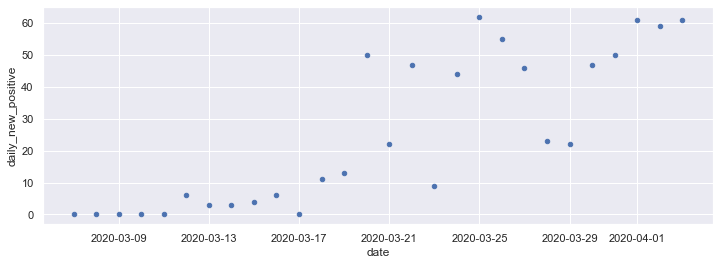

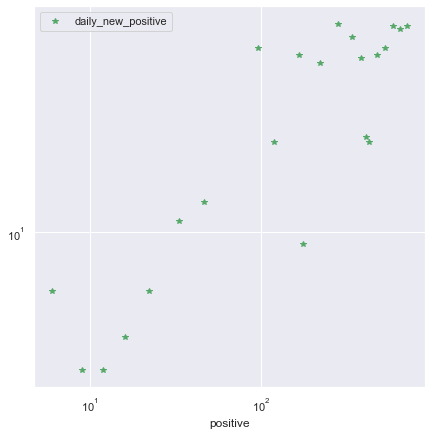

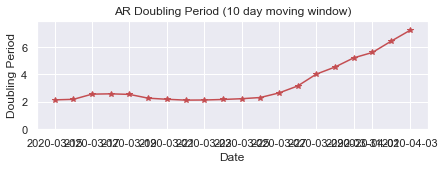

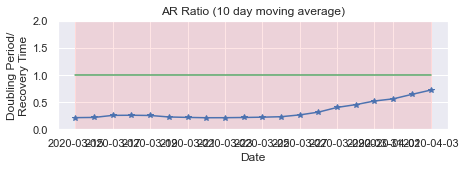

State=RI  (last_update=2020-04-03T15:50)
Doubling every 3.31 days based on last 10 days of data
(naive estimates: current_unresolved=605 hosp=90 icu=24)


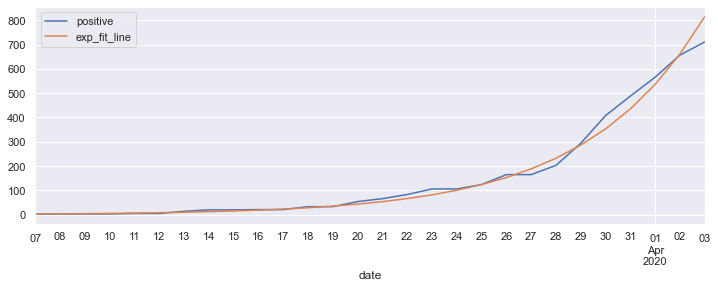

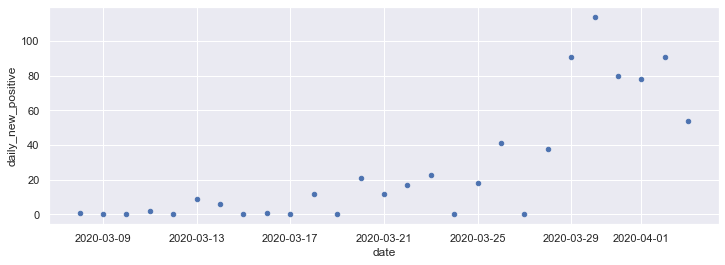

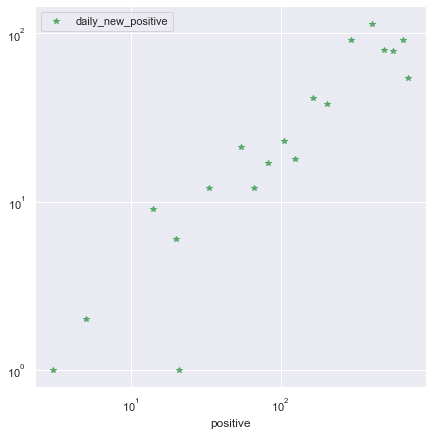

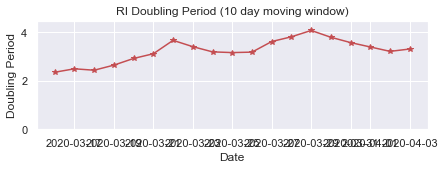

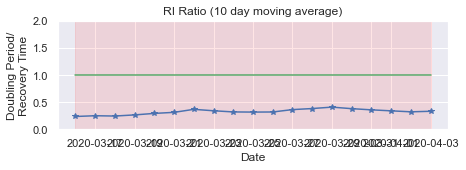

State=IA  (last_update=2020-04-03T16:30)
Doubling every 3.97 days based on last 10 days of data
(naive estimates: current_unresolved=575 hosp=86 icu=23)


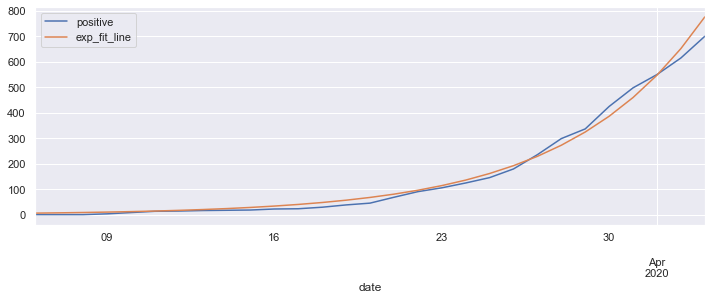

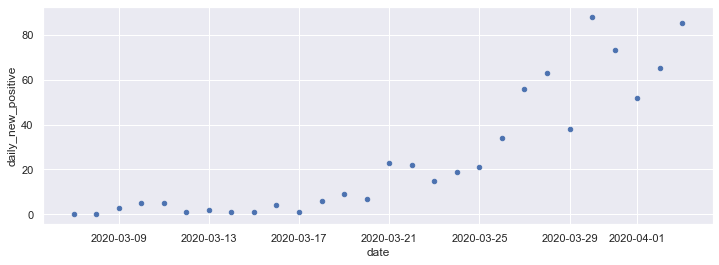

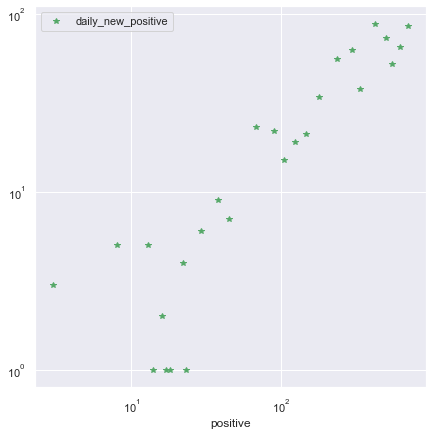

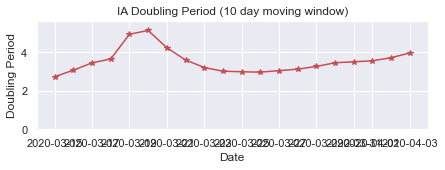

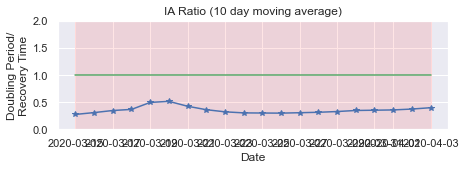

State=KS  (last_update=2020-04-03T12:00)
Doubling every 3.99 days based on last 10 days of data
(naive estimates: current_unresolved=522 hosp=78 icu=20)


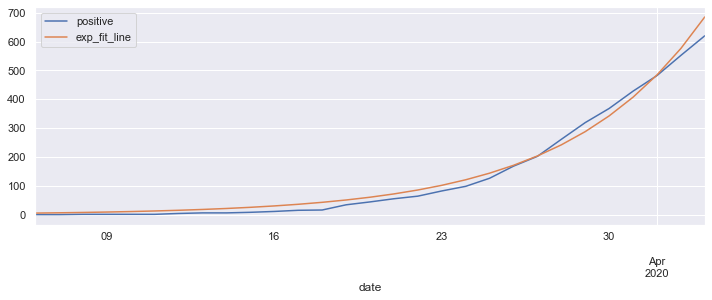

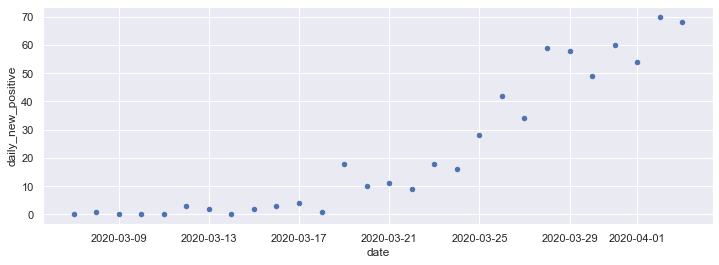

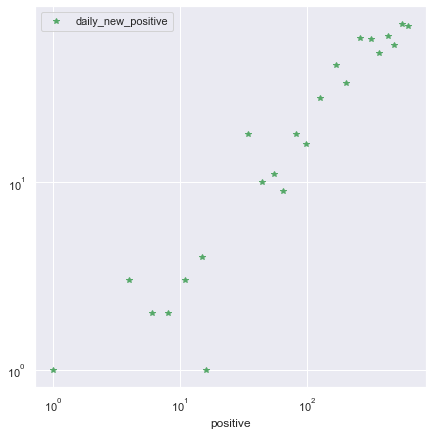

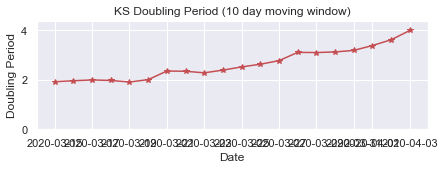

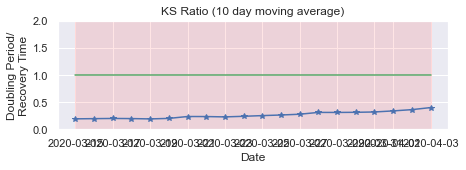

State=NH  (last_update=2020-04-03T09:00)
Doubling every 4.09 days based on last 10 days of data
(naive estimates: current_unresolved=378 hosp=56 icu=15)


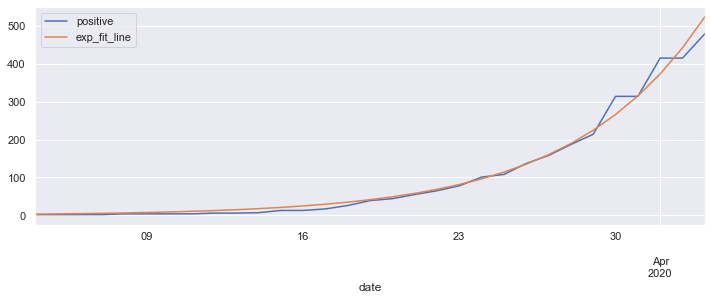

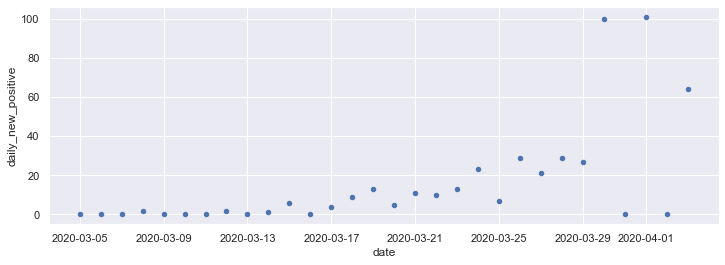

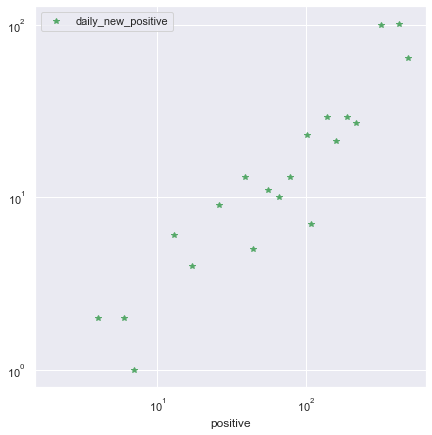

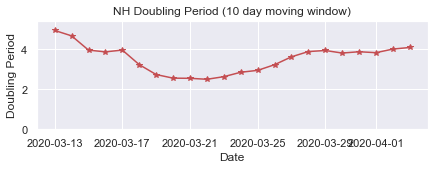

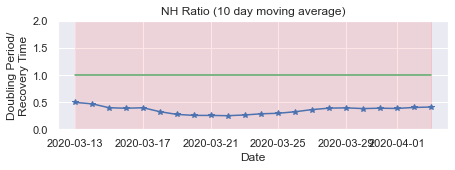

State=NM  (last_update=2020-04-03T00:00)
Doubling every 4.38 days based on last 10 days of data
(naive estimates: current_unresolved=320 hosp=48 icu=12)


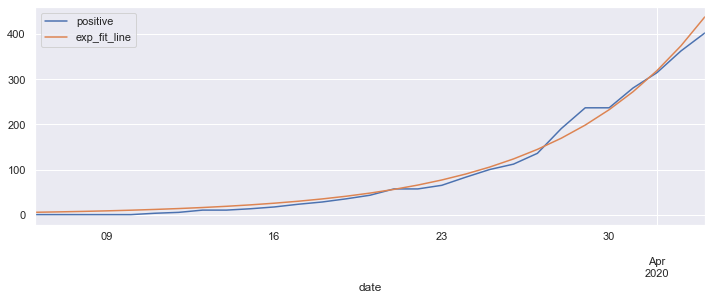

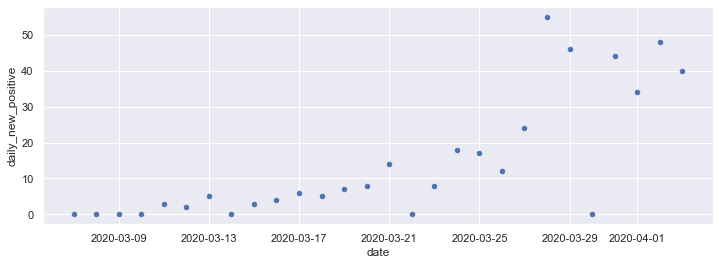

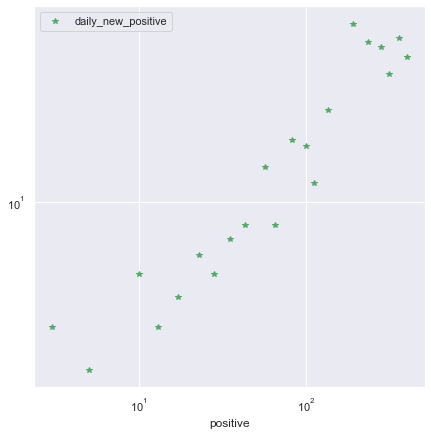

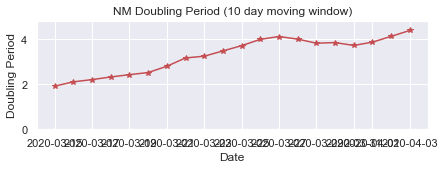

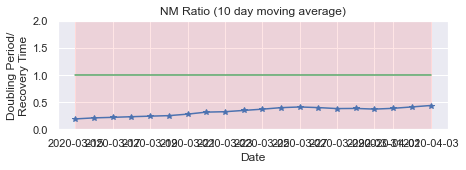

State=DE  (last_update=2020-04-03T00:00)
Doubling every 4.5 days based on last 10 days of data
(naive estimates: current_unresolved=359 hosp=53 icu=14)


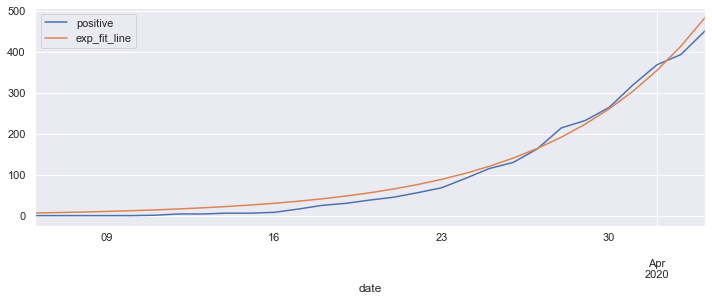

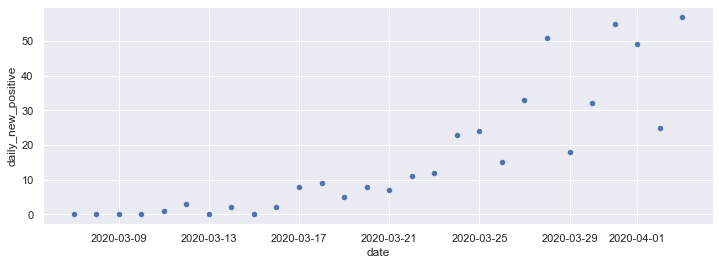

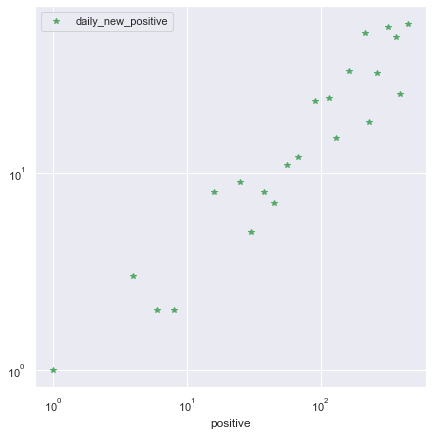

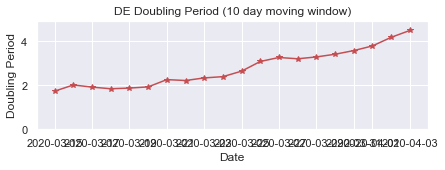

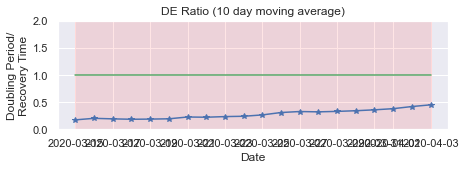

State=ME  (last_update=2020-04-03T12:00)
Doubling every 5.57 days based on last 10 days of data
(naive estimates: current_unresolved=307 hosp=46 icu=12)


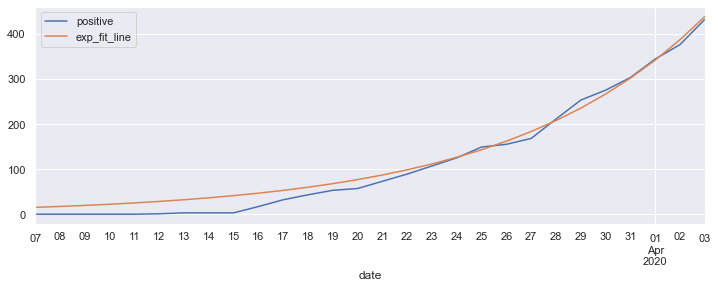

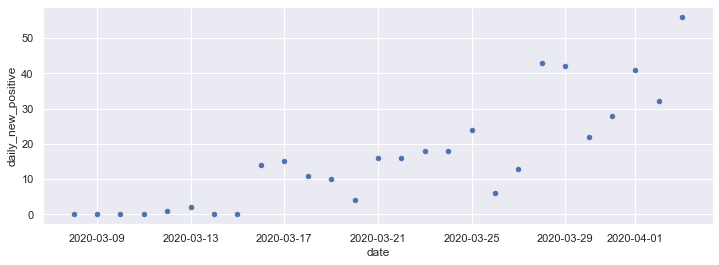

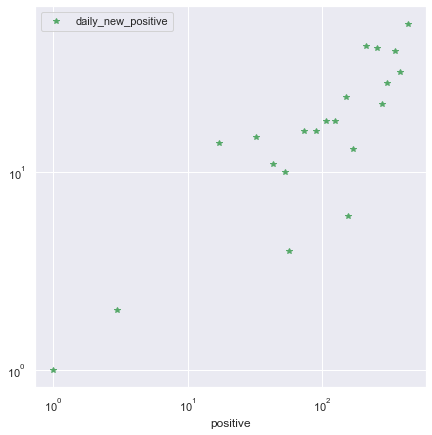

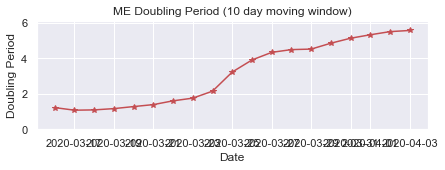

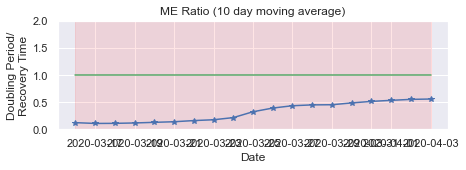

State=VT  (last_update=2020-04-03T13:00)
Doubling every 5.85 days based on last 10 days of data
(naive estimates: current_unresolved=294 hosp=44 icu=11)


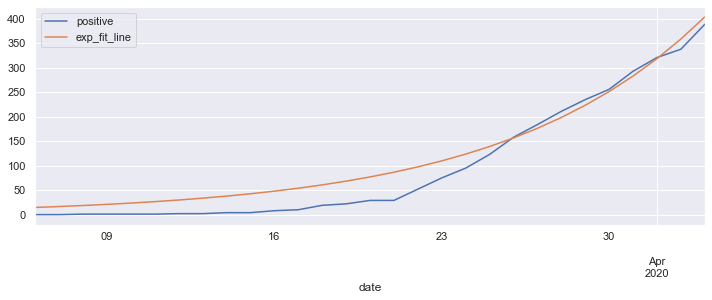

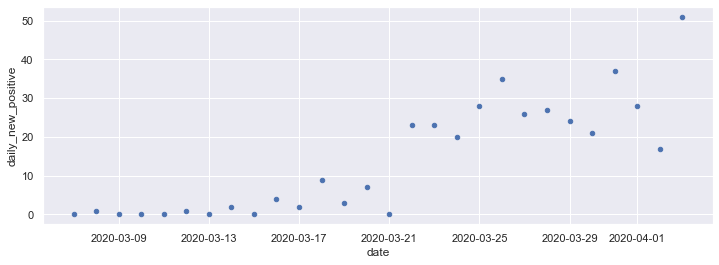

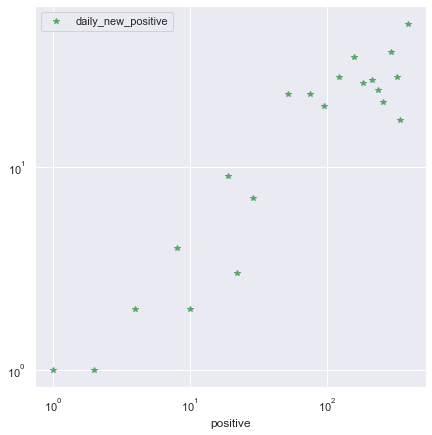

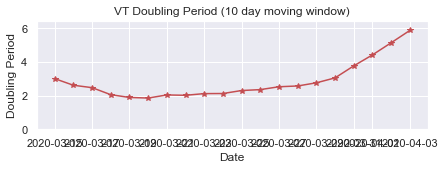

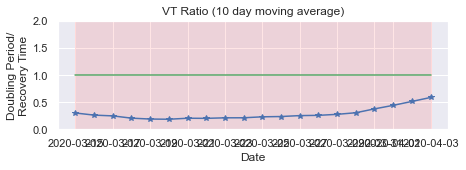

State=PR  (last_update=2020-04-03T07:00)
Doubling every 2.97 days based on last 10 days of data
(naive estimates: current_unresolved=339 hosp=50 icu=13)


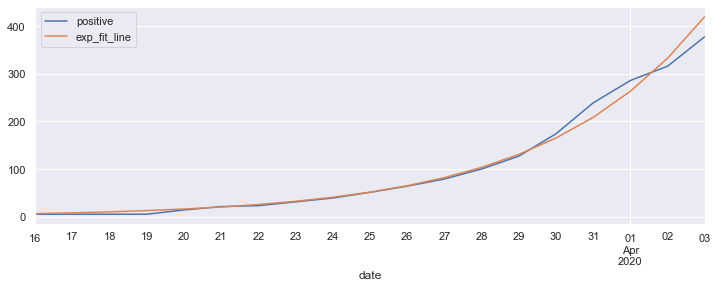

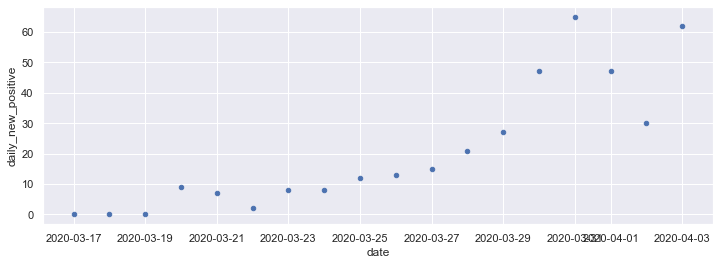

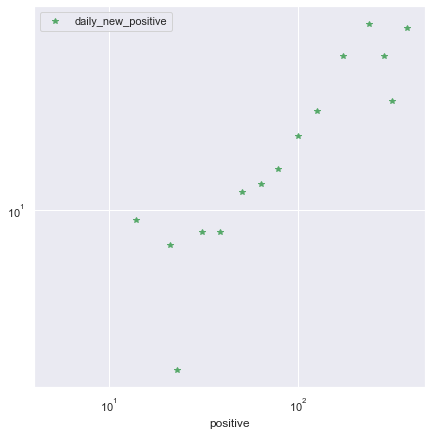

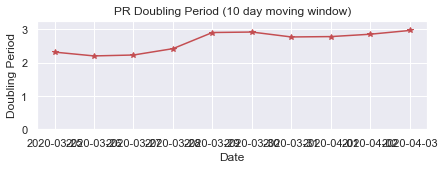

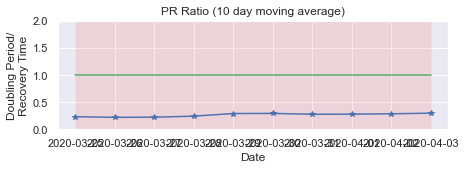

State=HI  (last_update=2020-04-03T18:00)
Doubling every 5.09 days based on last 10 days of data
(naive estimates: current_unresolved=208 hosp=31 icu=8)


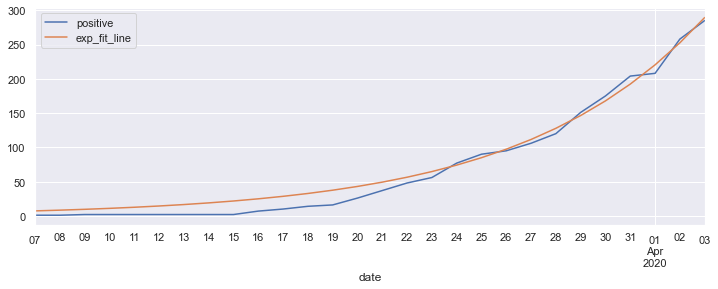

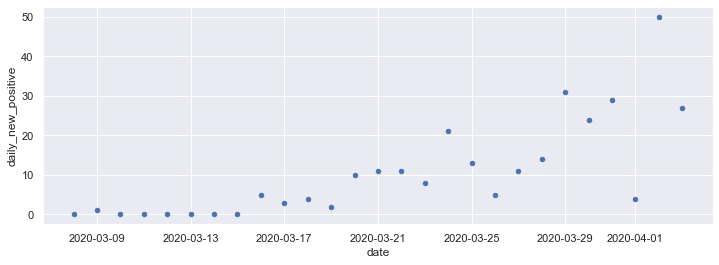

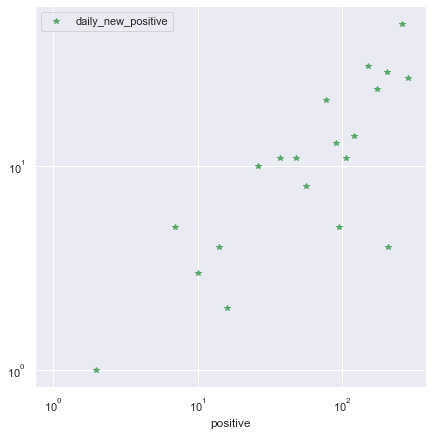

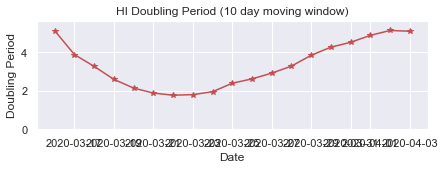

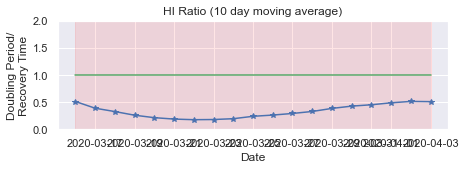

State=NE  (last_update=2020-04-03T19:00)
Doubling every 3.98 days based on last 10 days of data
(naive estimates: current_unresolved=227 hosp=34 icu=9)


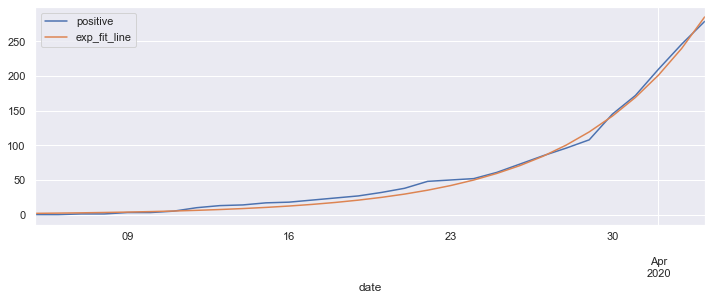

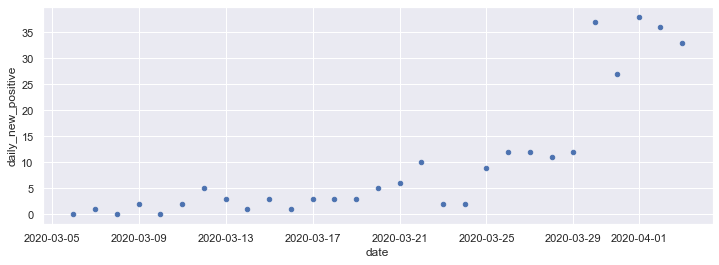

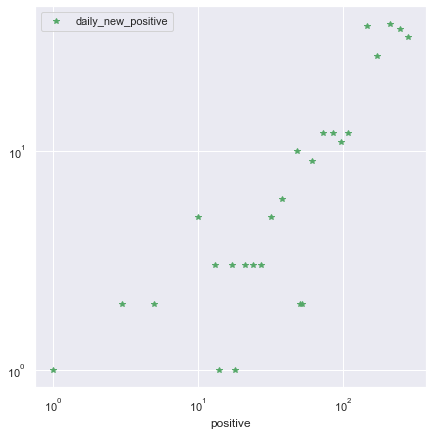

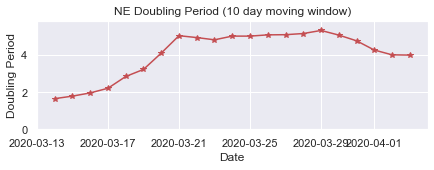

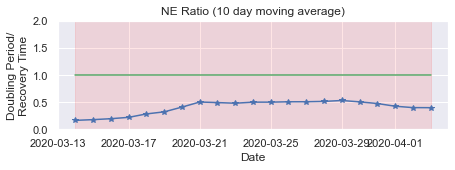

State=MT  (last_update=2020-04-03T18:30)
Doubling every 4.35 days based on last 10 days of data
(naive estimates: current_unresolved=197 hosp=29 icu=7)


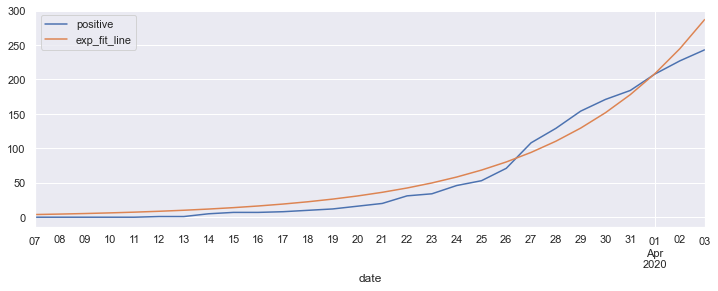

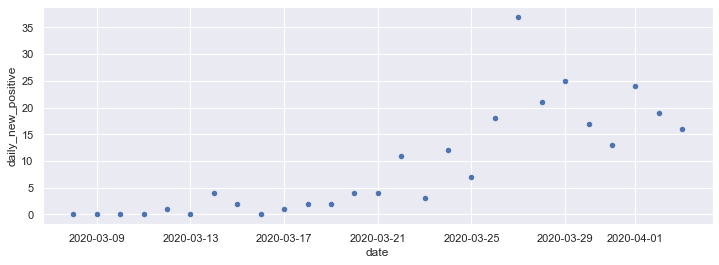

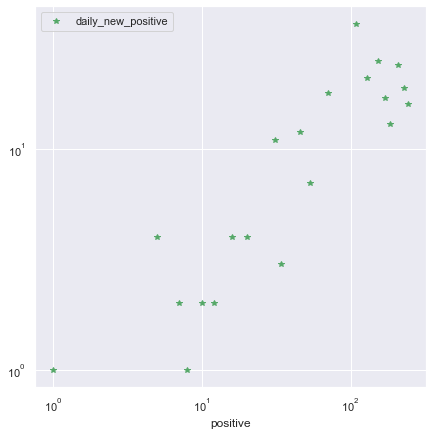

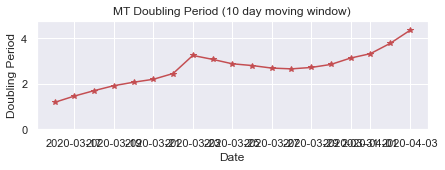

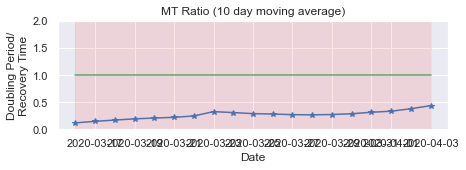

State=WV  (last_update=2020-04-03T10:00)
Doubling every 3.5 days based on last 10 days of data
(naive estimates: current_unresolved=217 hosp=32 icu=8)


/Users/drskippy/Working/2020covid19/covid_analysis/models.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  return -np.log(.5)/m, fit_line_points


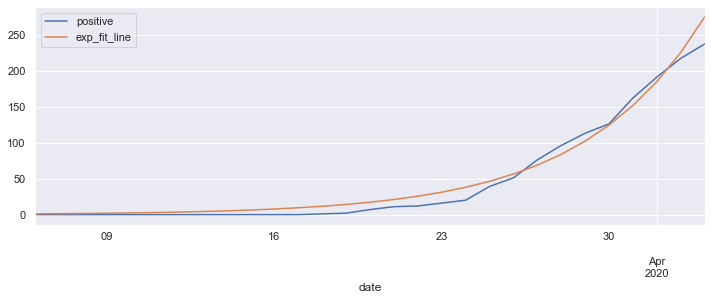

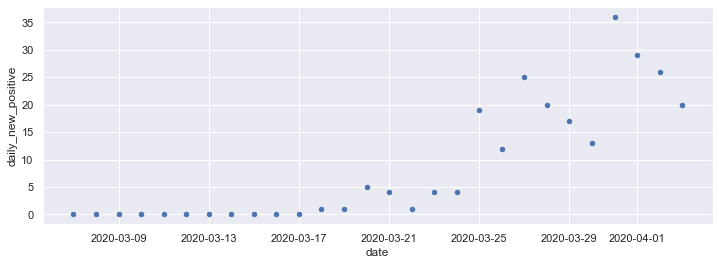

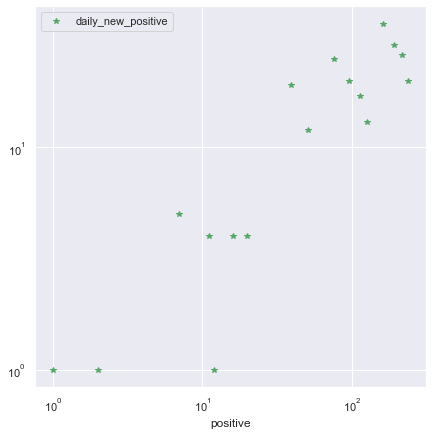

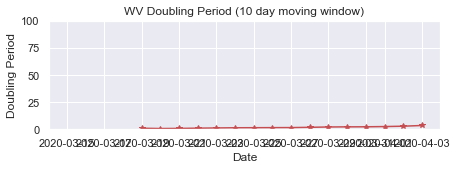

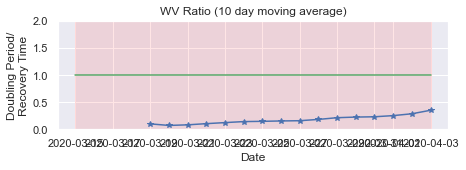

State=SD  (last_update=2020-04-03T13:21)
Doubling every 4.07 days based on last 10 days of data
(naive estimates: current_unresolved=157 hosp=23 icu=6)


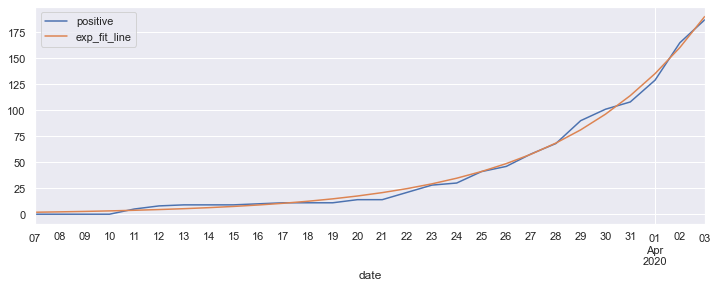

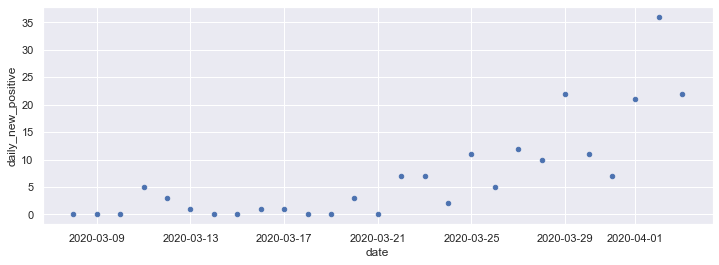

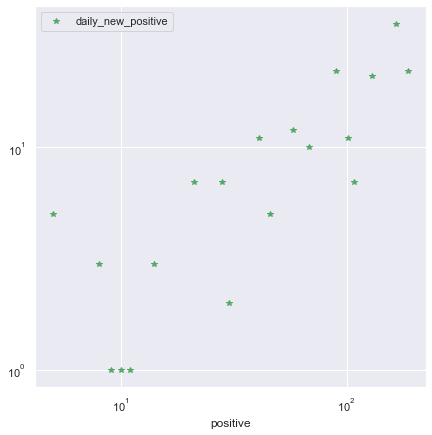

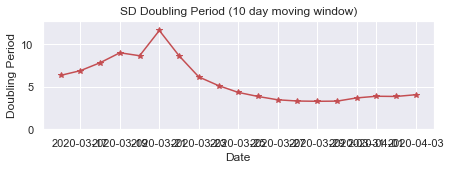

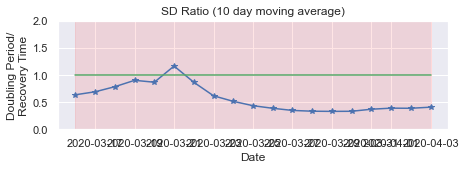

State=ND  (last_update=2020-04-03T13:50)
Doubling every 4.32 days based on last 10 days of data
(naive estimates: current_unresolved=139 hosp=20 icu=5)


/Users/drskippy/Working/2020covid19/covid_analysis/models.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  return -np.log(.5)/m, fit_line_points


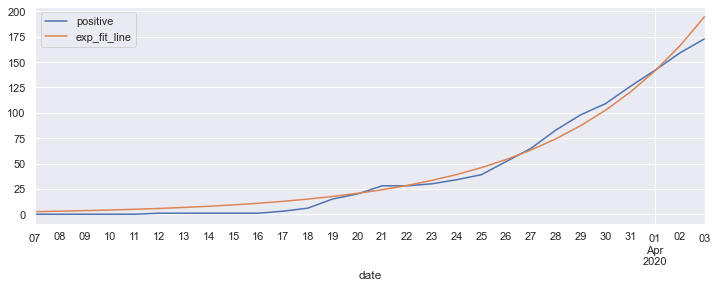

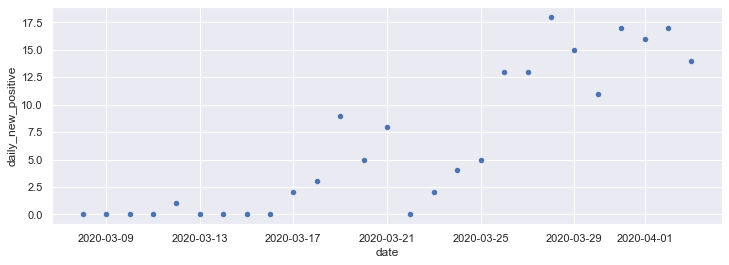

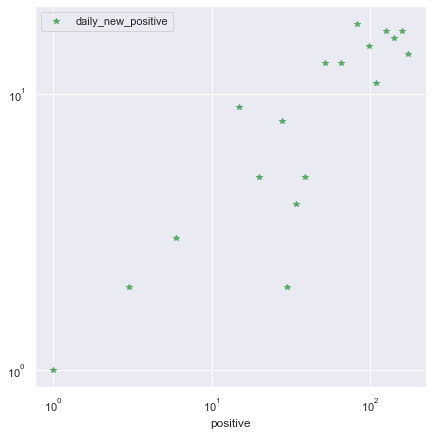

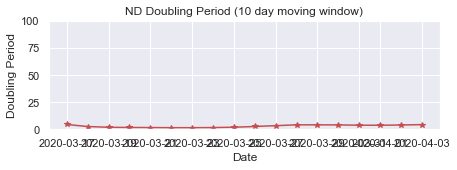

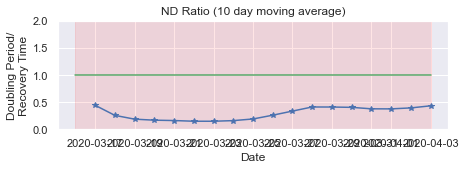

State=WY  (last_update=2020-04-03T20:00)
Doubling every 4.96 days based on last 10 days of data
(naive estimates: current_unresolved=133 hosp=19 icu=5)


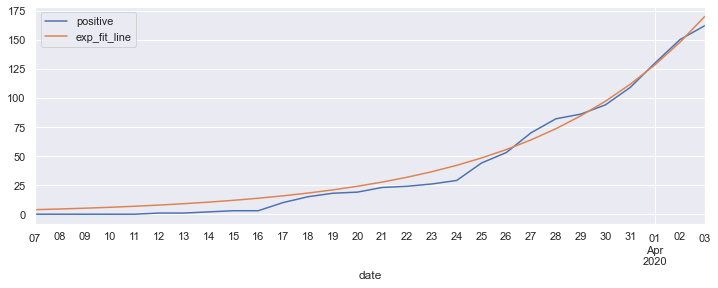

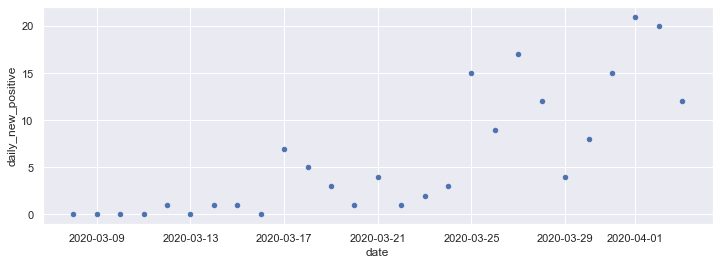

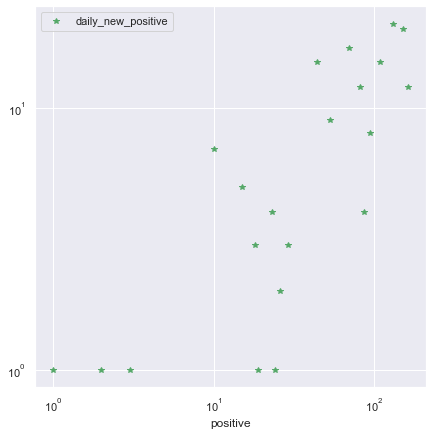

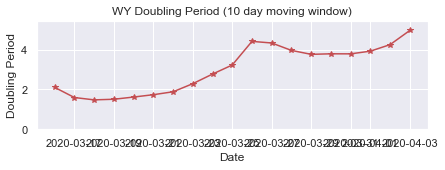

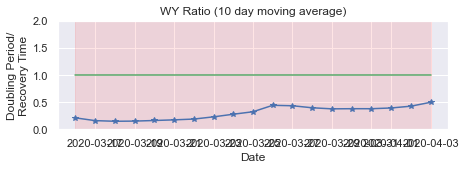

State=AK  (last_update=2020-04-03T16:00)
Doubling every 5.09 days based on last 10 days of data
(naive estimates: current_unresolved=121 hosp=18 icu=4)


/Users/drskippy/Working/2020covid19/covid_analysis/models.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  return -np.log(.5)/m, fit_line_points


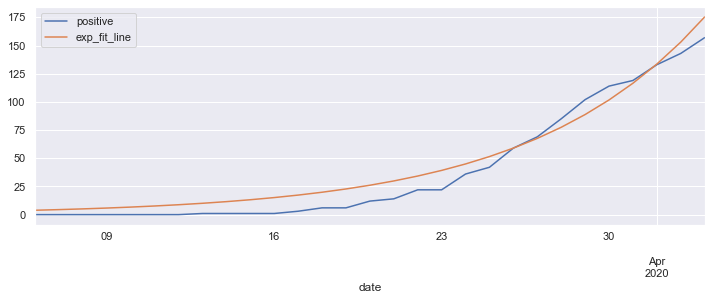

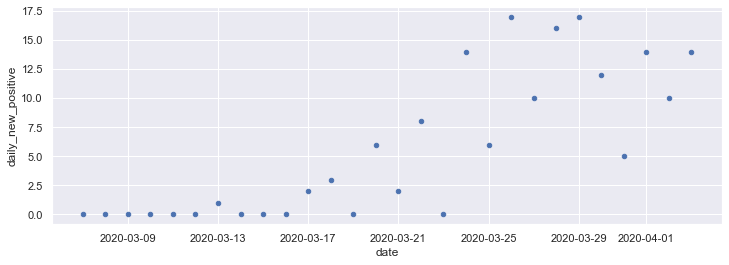

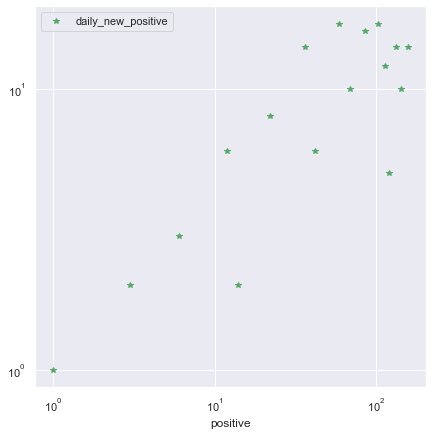

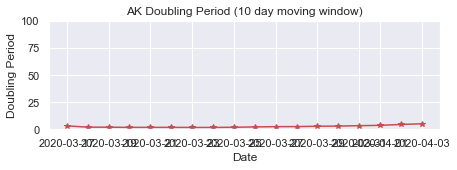

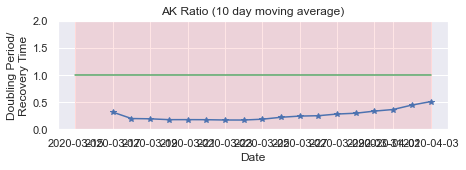

State=GU  (last_update=2020-04-03T09:45)
Doubling every 7.97 days based on last 10 days of data
(naive estimates: current_unresolved=52 hosp=7 icu=2)


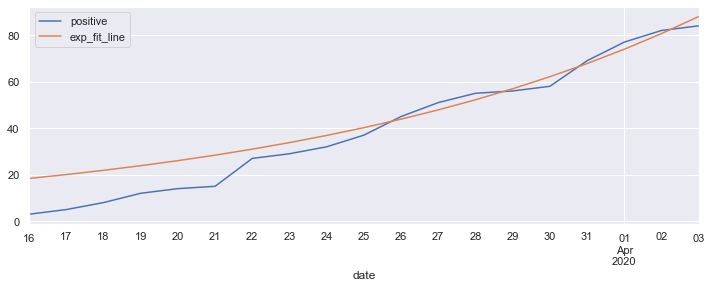

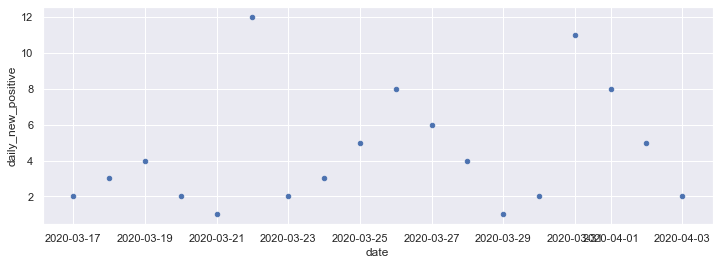

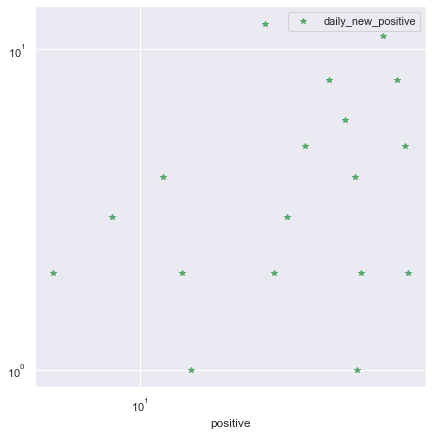

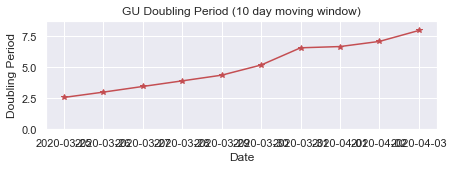

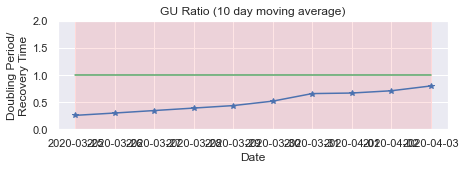

State=VI  (last_update=2020-04-03T14:30)
Doubling every 7.44 days based on last 10 days of data
(naive estimates: current_unresolved=21 hosp=3 icu=0)


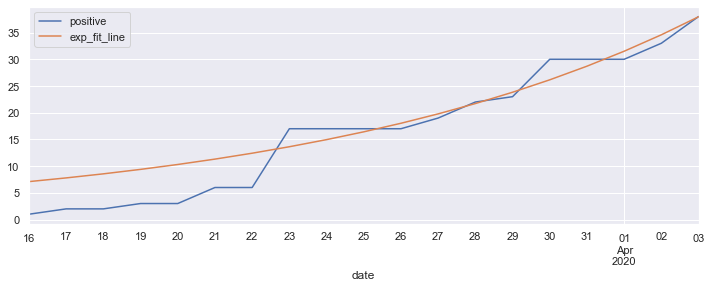

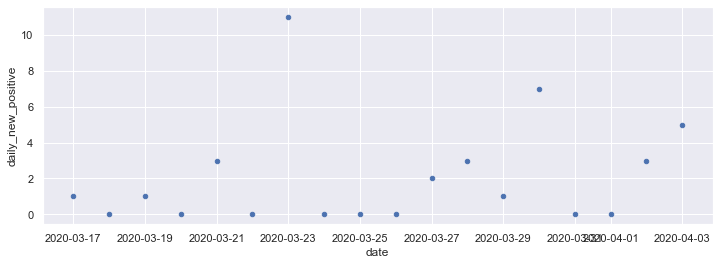

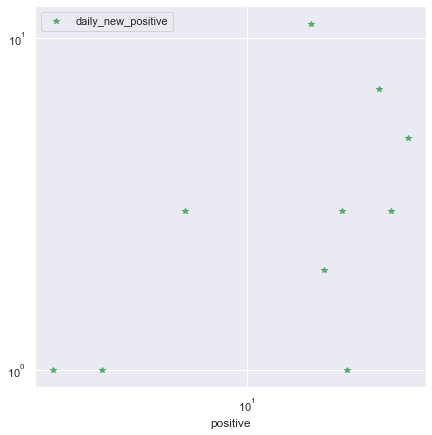

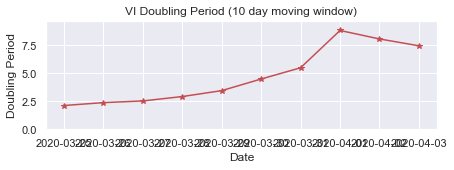

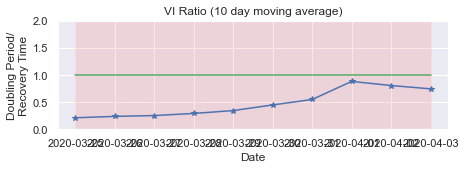

State=MP  (last_update=2020-04-02T18:30)
Doubling every 2.42 days based on last 10 days of data
(naive estimates: current_unresolved=8 hosp=1 icu=0)


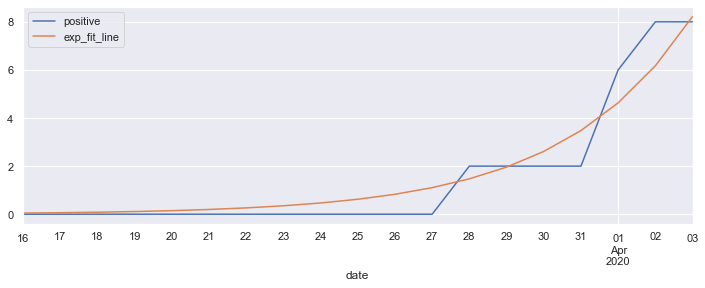

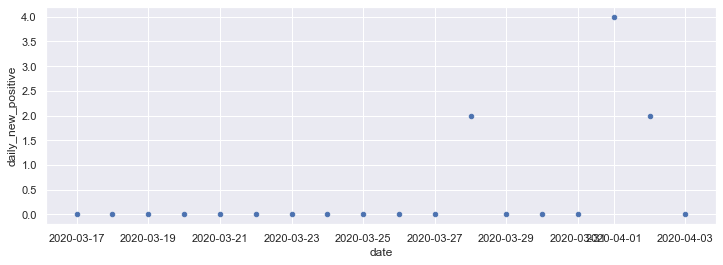

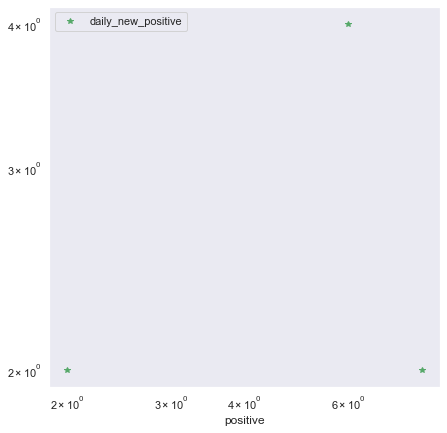

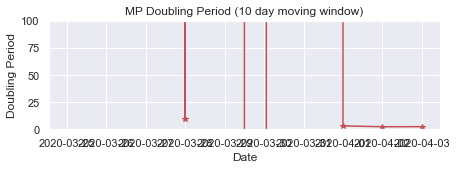

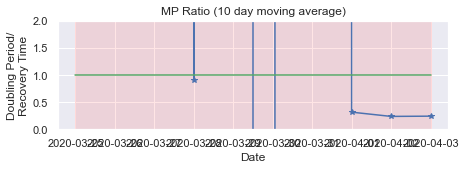

State=AS  (last_update=2020-03-30T23:00)
Doubling every nan days based on last 10 days of data
(naive estimates: current_unresolved=0 hosp=0 icu=0)


/Users/drskippy/Library/Caches/pypoetry/virtualenvs/covid19-r4Mn4VDy-py3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:520: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  labels = axis.get_majorticklabels() + axis.get_minorticklabels()


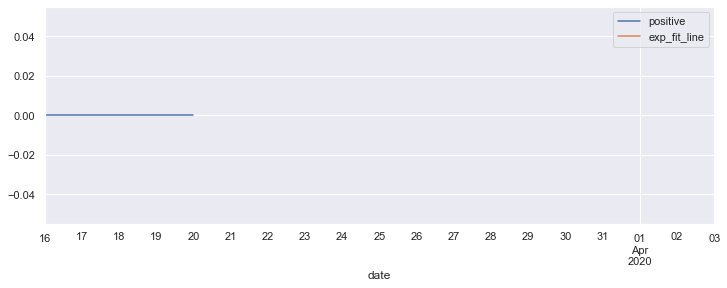

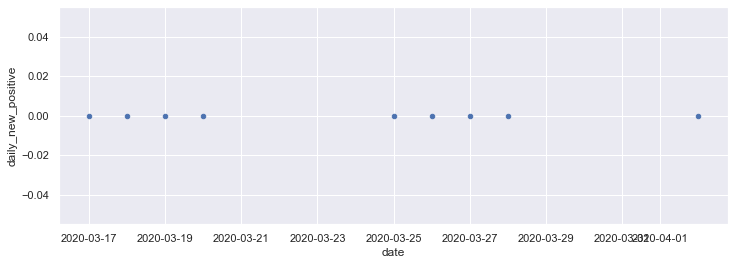

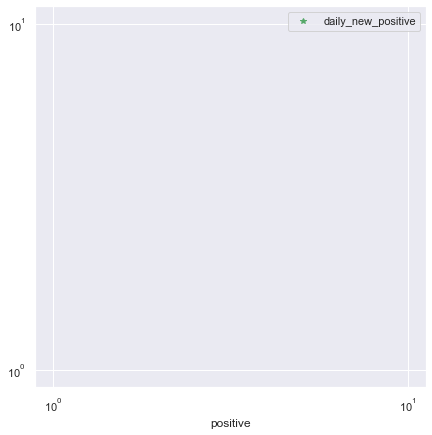

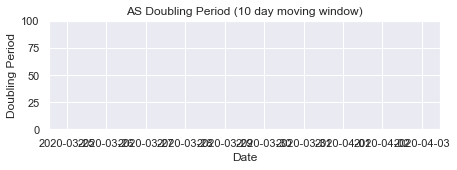

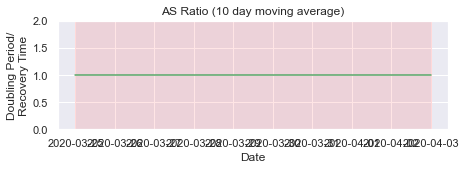

In [14]:
last_n_days = 10
dps = []
for s in states_in_order:
    dfq, dt, lud = get_state_doubling_df(df, s, use_last_n_days=last_n_days)
    dps.append(dt)
    cn, cnh, cni = estimate_current_cases(dfq.daily_new_positive.values)
    lu = str(lud)[:16]
    print("State={}  (last_update={})".format(s, lu))
    print("Doubling every {:.3} days based on last {} days of data".format(dt, last_n_days))
    print("(naive estimates: current_unresolved={} hosp={} icu={})".format(cn, cnh, cni))
    dfq.plot(x="date", y=["positive", "exp_fit_line"], figsize=[12,4])
    if len(dfq) > 1:
        dfq.plot.scatter(x="date", y="daily_new_positive", figsize=[12,4])
    dfq.plot(x="positive", y="daily_new_positive", figsize=[7,7], style="*g", logy=True, logx=True)
    period_factor_plot(dfq,s, ylimit=2)
    plt.show()

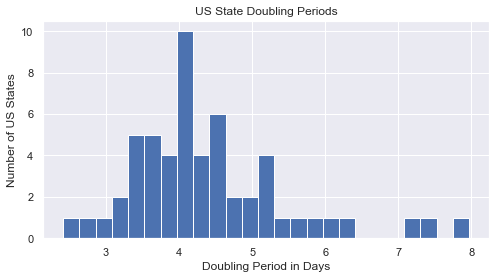

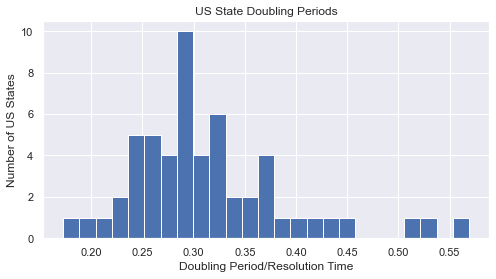

In [15]:
plt.figure(figsize=[8,4])
dps = np.array(dps)
dps = dps[~np.isnan(dps)]
dp_state = dps[dps < 30]
dp_state = dp_state[dp_state > 0]
a = plt.hist(dp_state, bins=25)
plt.title("US State Doubling Periods")
plt.xlabel("Doubling Period in Days")
plt.ylabel("Number of US States")
plt.show()
# or in terms of resolution time
plt.figure(figsize=[8,4])
resolution_time = 14
a = plt.hist(dp_state/resolution_time, bins=25)
plt.title("US State Doubling Periods")
plt.xlabel("Doubling Period/Resolution Time")
plt.ylabel("Number of US States")
plt.show()

### Rolling Doubling Period for US

### Rolling Doubling Period World

In [16]:
dfw, wsl = get_world_dataset_df_from_file()
dfw.head()

Entity state          Date  positive       date  \
0  Afghanistan   AFG  Dec 31, 2019         0 2019-12-31   
1  Afghanistan   AFG   Jan 1, 2020         0 2020-01-01   
2  Afghanistan   AFG   Jan 2, 2020         0 2020-01-02   
3  Afghanistan   AFG   Jan 3, 2020         0 2020-01-03   
4  Afghanistan   AFG   Jan 4, 2020         0 2020-01-04   

                lastUpdateEt  negative  pending  
0 2020-04-04 16:14:57.277705         0        0  
1 2020-04-04 16:14:57.277705         0        0  
2 2020-04-04 16:14:57.277705         0        0  
3 2020-04-04 16:14:57.277705         0        0  
4 2020-04-04 16:14:57.277705         0        0

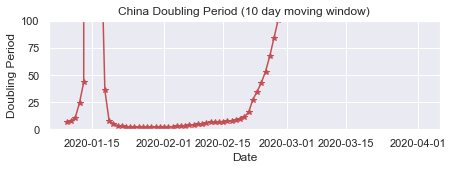

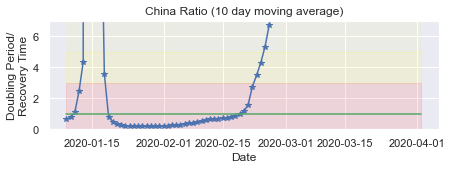

/Users/drskippy/Working/2020covid19/covid_analysis/models.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  return -np.log(.5)/m, fit_line_points


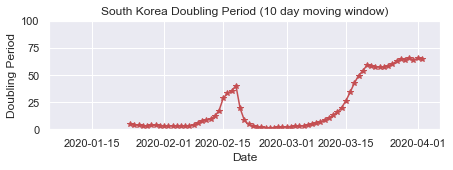

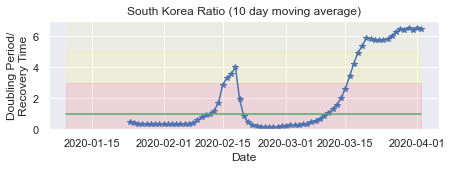

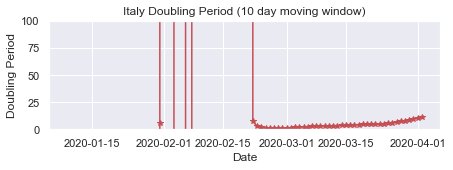

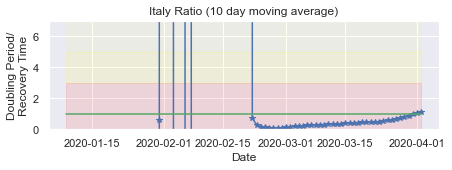

/Users/drskippy/Working/2020covid19/covid_analysis/models.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  return -np.log(.5)/m, fit_line_points


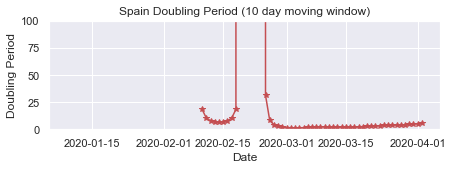

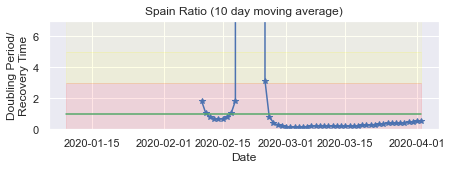

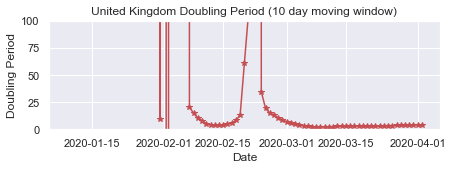

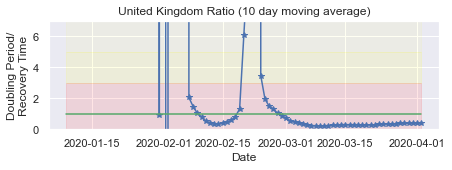

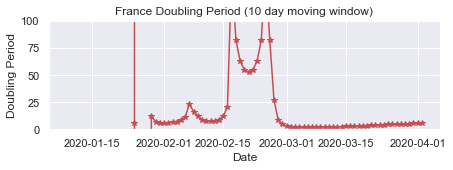

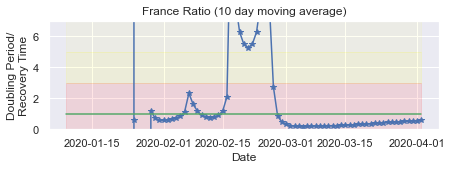

/Users/drskippy/Working/2020covid19/covid_analysis/models.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  return -np.log(.5)/m, fit_line_points


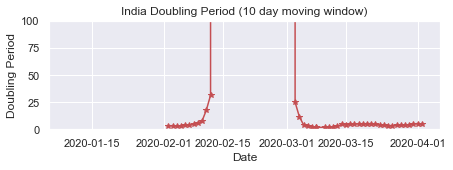

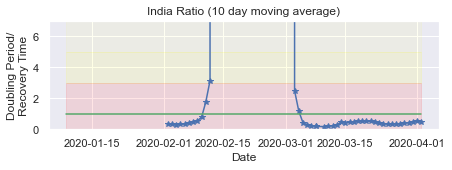

In [17]:
period_factor_plot(dfw,"CHN")
period_factor_plot(dfw,"KOR")
period_factor_plot(dfw,"ITA")
period_factor_plot(dfw,"ESP")
period_factor_plot(dfw,"GBR")
period_factor_plot(dfw,"FRA")
period_factor_plot(dfw,"IND")

### Rolling Doubling Period States

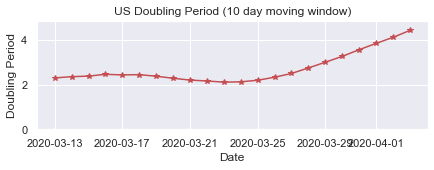

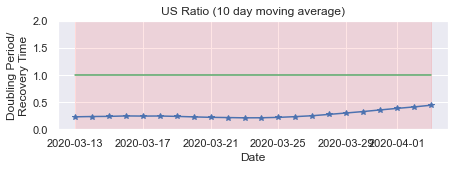

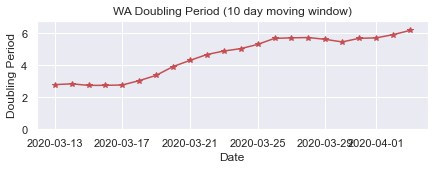

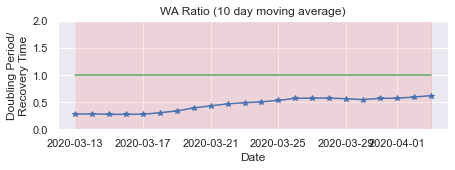

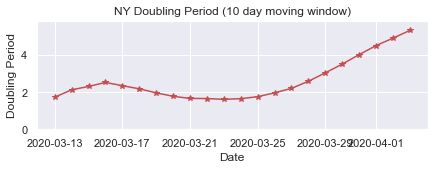

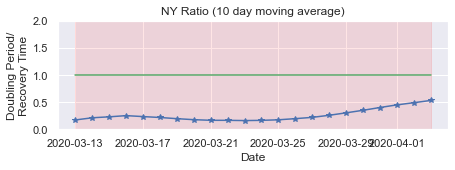

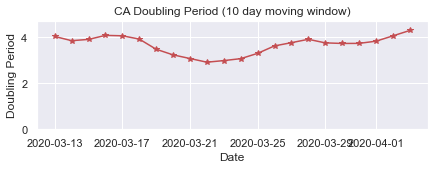

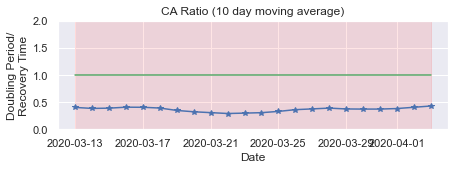

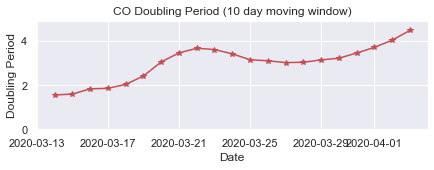

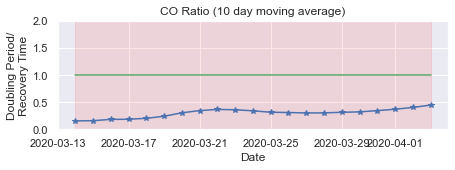

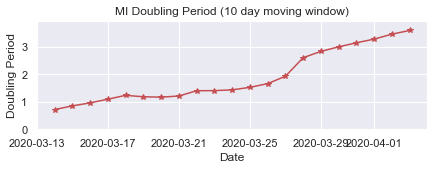

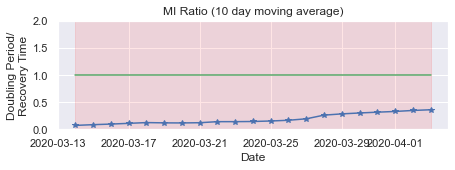

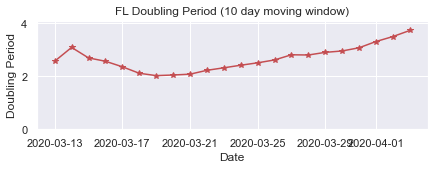

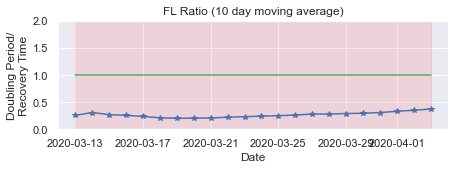

In [18]:
dfw, _ = get_state_df(df, "*")
period_factor_plot(dfw,"*", ylimit=2)
dfw, _ = get_state_df(df, "WA")
period_factor_plot(dfw,"WA", ylimit=2)
dfw, _ = get_state_df(df, "NY")
period_factor_plot(dfw,"NY", ylimit=2)
dfw, _ = get_state_df(df, "CA")
period_factor_plot(dfw,"CA", ylimit=2)
dfw, _ = get_state_df(df, "CO")
period_factor_plot(dfw,"CO", ylimit=2)
dfw, _ = get_state_df(df, "MI")
period_factor_plot(dfw,"MI", ylimit=2)
dfw, _ = get_state_df(df, "FL")
period_factor_plot(dfw,"FL", ylimit=2)

### Big Grid of Daily Total Cases by State

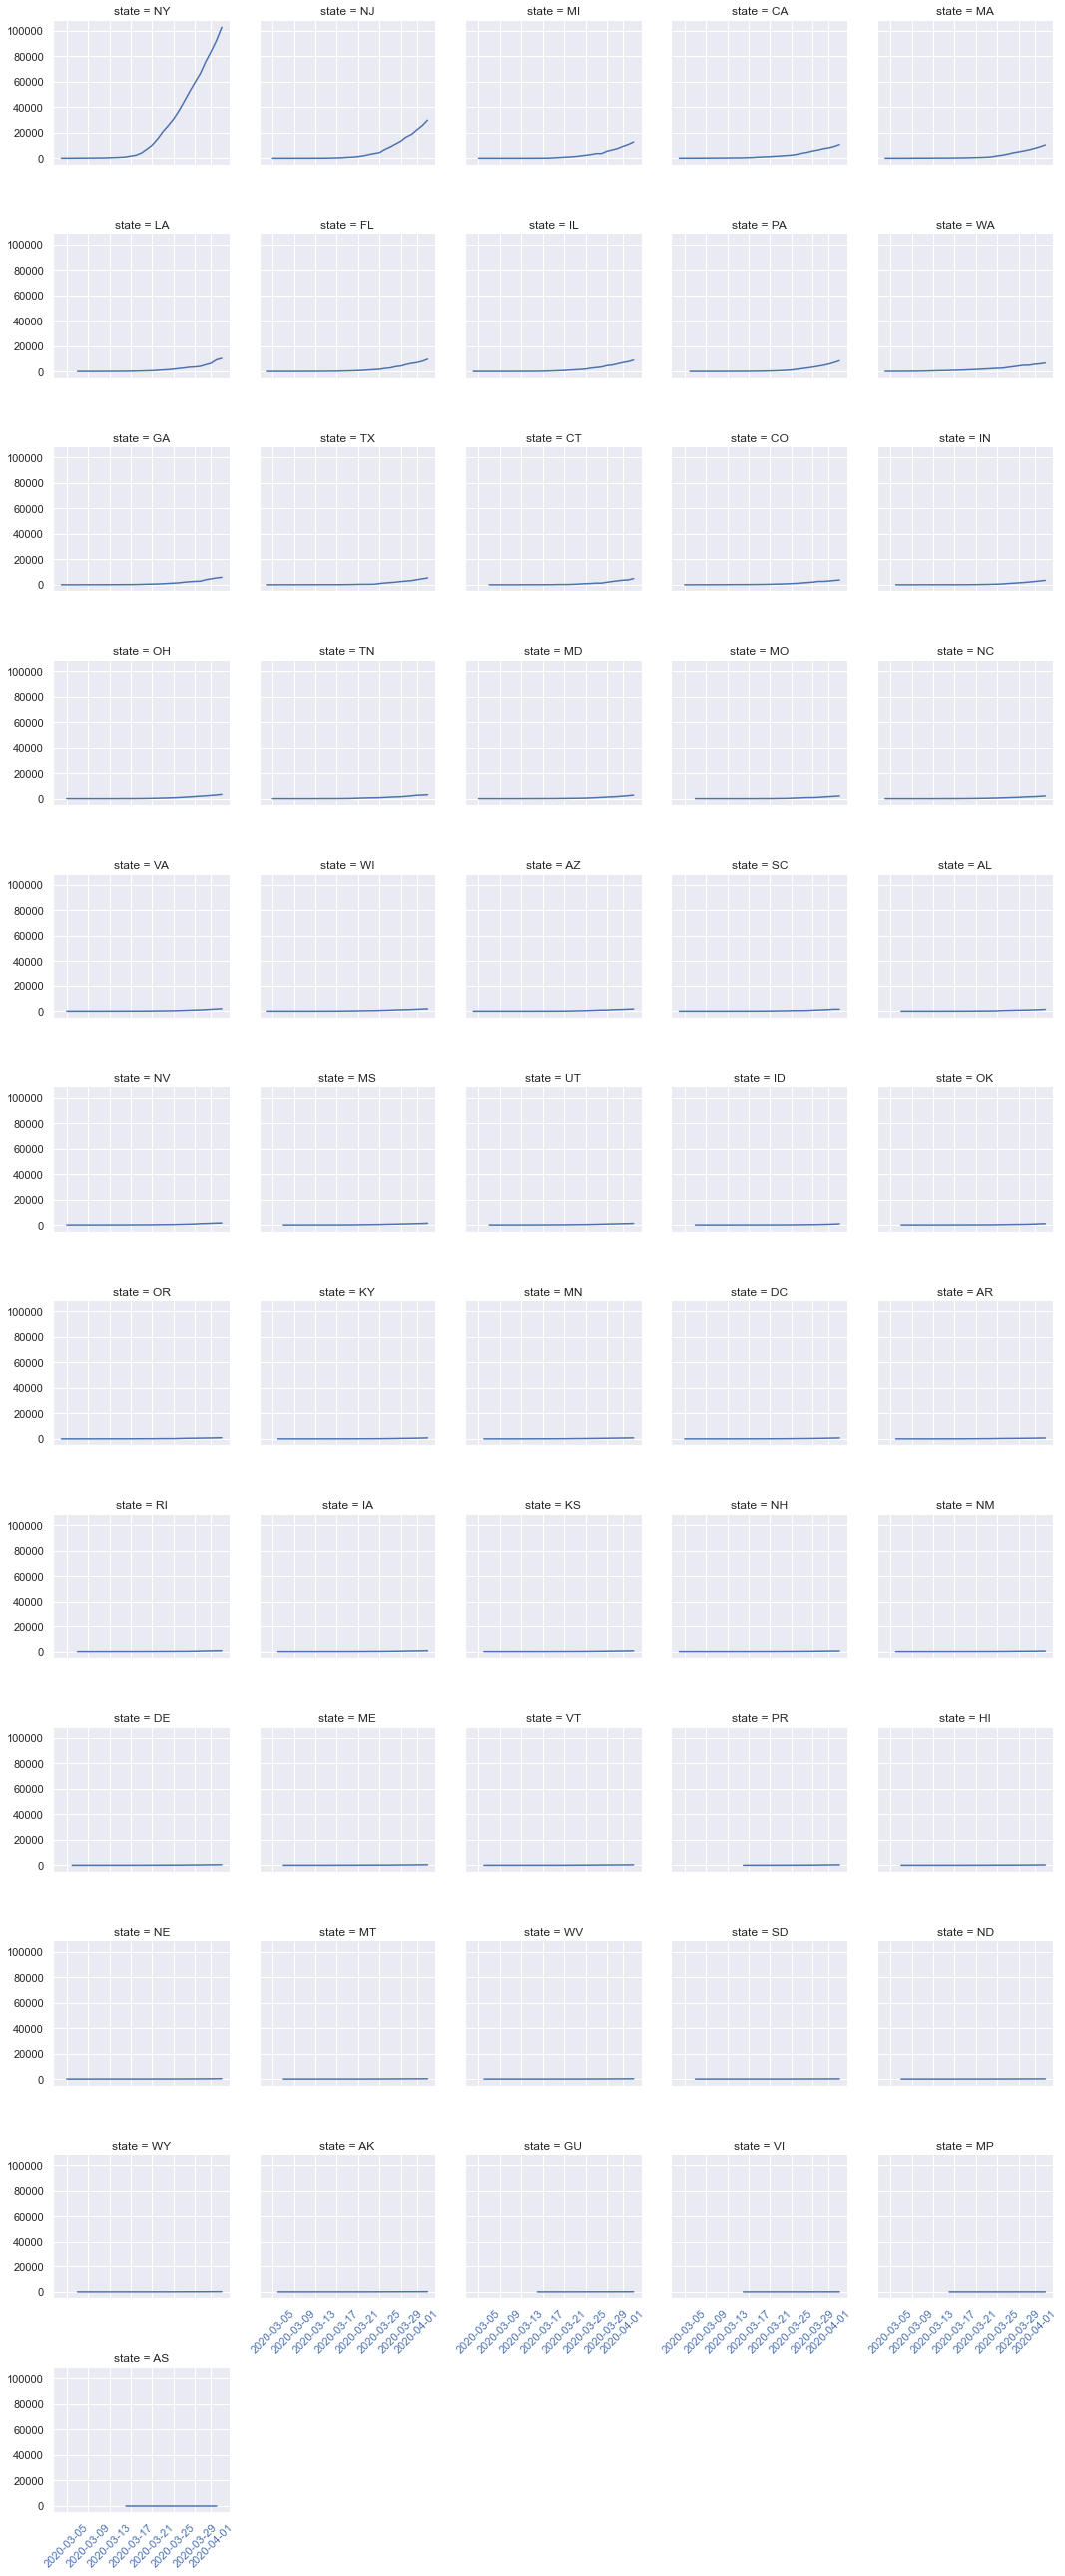

In [19]:
g = sns.FacetGrid(df, col="state", col_wrap=5, height=3, margin_titles=True)
g.map(plt.plot,"date","positive",color="b")
g.map(plt.xticks, rotation=45)